# FP CHARACTERISTICS

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multicomp as mc
from scipy import stats
import pickle
from scipy.stats import mannwhitneyu as mannwu
from matplotlib.ticker import MultipleLocator
from itertools import combinations
import matplotlib.ticker as mtick
from scipy.stats import false_discovery_control
import matplotlib.colors as mcolors

import sys
sys.path.append("./scripts/modules")

from benchmarking_definitions import *
from plotting import *
from regions import *

In [11]:
def x_transform(freq):

    if freq < 1:
        freq = freq*100

    if freq < 10:
        return freq*10
    else:
        return 0.5*freq + 50

In [12]:
x_transformed_points = []
for freq in freqs:
    x_transformed_points.append(x_transform(freq))
x_transformed_points

[10.0, 20.0, 30.0, 40.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0]

In [13]:
tagsRv = pd.read_csv("/home/sm624/projects/mixed_calls/benchmarking/comprehensive/FINAL_tag_list.csv", names=["tag"])["tag"].values
tagsL1234 = pd.read_csv("/home/sm624/projects/mixed_calls/benchmarking/comprehensive/FINAL_tag_list_L1234.csv", names=["tag"]).tag.values

len(tagsRv), len(tagsL1234)

(2500, 1000)

In [14]:
faded_P_cols = {"TP": mcolors.to_rgba(TP_col, alpha=0.45),
                "FP": mcolors.to_rgba(FP_col, alpha=0.45)}

# [done] L1234: FP at AF > 50%

In [5]:
num_FP_AFover50_df = pd.read_csv("./data/FP_characteristics/ISS_L1234_num_FP_AFover50.csv")
print(num_FP_AFover50_df.shape)
num_FP_AFover50_df.head(2)

(6000, 3)


,tag,tool,num_FP
0,sim1_L1_mutant_50_0.01,FB,99
1,sim1_L1_mutant_50_0.01,LF,81


In [6]:
for tool in tools:

    tool_df = num_FP_AFover50_df[num_FP_AFover50_df.tool == tool]

    print(tool_mapping[tool], tool_df.num_FP.median())

FreeBayes 152.0
LoFreq 86.5
Mutect2 163.0
Pilon 77.0
VarDict 164.0
VarScan2 93.0


# [done] Percentage of FP calls that are SNPs out of all FPs (per tool)

In [6]:
Rv_FP_type_df = pd.read_csv("./data/FP_characteristics/ISS_H37Rv_percent_SNP.csv")
print(Rv_FP_type_df.shape)
Rv_FP_type_df.head(2)

(2500, 13)


,tag,FB_percent_SNP,LF_percent_SNP,MT_percent_SNP,PL_percent_SNP,VD_percent_SNP,VS_percent_SNP,FB_total,LF_total,MT_total,PL_total,VD_total,VS_total
0,sim1_h37rv_mutant_1_50_0.01,96.551724,NaN,100.0,100.0,95.483871,NaN,145,0,7,72,310,0
1,sim1_h37rv_mutant_2_50_0.01,94.354839,NaN,NaN,100.0,95.289855,NaN,124,0,0,72,276,0


In [7]:
L1234_FP_type_df = pd.read_csv("./data/FP_characteristics/ISS_L1234_percent_SNP.csv")
print(L1234_FP_type_df.shape)
L1234_FP_type_df.head(2)

(1000, 13)


,tag,FB_percent_SNP,LF_percent_SNP,MT_percent_SNP,PL_percent_SNP,VD_percent_SNP,VS_percent_SNP,FB_total,LF_total,MT_total,PL_total,VD_total,VS_total
0,sim1_L1_mutant_50_0.01,96.412037,94.134078,78.441558,97.791165,85.988201,95.918367,864,358,385,498,678,294
1,sim1_L2_mutant_50_0.01,95.535714,91.156463,74.587459,96.983759,86.933798,91.836735,672,294,303,431,574,245


In [8]:
tool_colors_i = {i:tool_colors[tools[i]] for i in range(len(tools))}

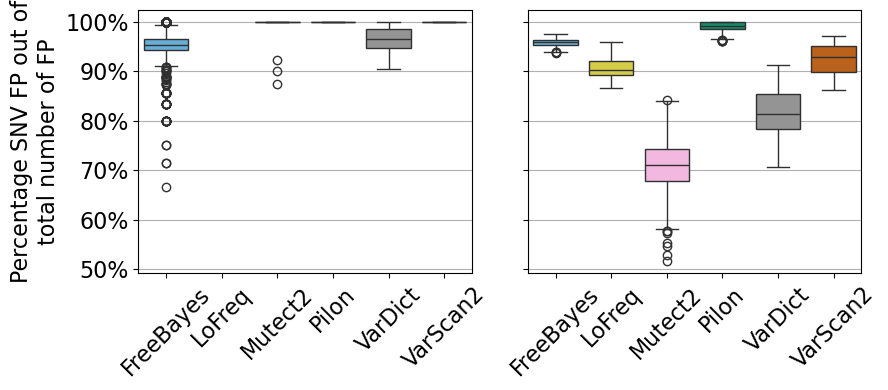

In [9]:
fig, (ax_Rv, ax_L1234) = plt.subplots(1, 2, sharey=True, figsize=(9, 4))

sns.boxplot([list(Rv_FP_type_df[Rv_FP_type_df[f"{tool}_total"] >= 5][f"{tool}_percent_SNP"].values) for tool in tools], palette=tool_colors_i, ax=ax_Rv)

sns.boxplot([list(L1234_FP_type_df[L1234_FP_type_df[f"{tool}_total"] >= 5][f"{tool}_percent_SNP"].values) for tool in tools], palette=tool_colors_i, ax=ax_L1234)

for ax in (ax_Rv, ax_L1234):
    
    ax.grid(axis="y", linewidth=0.8, zorder=0)

    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
    
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels([tool_mapping[t] for t in tools], fontsize=16, rotation=45, horizontalalignment="center")
    
    ax.tick_params(labelsize=16)

ax_Rv.set_ylabel("Percentage SNV FP out of\ntotal number of FP", ha="center", fontsize=16)

ax_Rv.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_percentage_SNP_FP_5orMoreFP.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_percentage_SNP_FP_5orMoreFP.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [52]:
all_SNP_FP_percents = []

for tool in tools:

    all_SNP_FP_percents += (list(Rv_FP_type_df[f"{tool}_percent_SNP"].values) + list(L1234_FP_type_df[f"{tool}_percent_SNP"].values))

np.nanmedian(all_SNP_FP_percents)

np.float64(96.3455149501661)

In [9]:
for tool in tools:

    print(tool)
    print(Rv_FP_type_df[Rv_FP_type_df[f"{tool}_total"] >= 5][f"{tool}_percent_SNP"].min())
    print(L1234_FP_type_df[L1234_FP_type_df[f"{tool}_total"] >= 5][f"{tool}_percent_SNP"].min())


FB
66.66666666666666
93.77401998462722
LF
nan
86.70694864048339
MT
87.5
51.58371040723983
PL
100.0
96.06299212598424
VD
90.57971014492752
70.63829787234043
VS
100.0
86.29441624365482


In [17]:
for tool in tools:

    print(tool)
    print(Rv_FP_type_df[Rv_FP_type_df[f"{tool}_percent_SNP"] == 0][f"{tool}_total"].max())
    display(Rv_FP_type_df[Rv_FP_type_df[f"{tool}_percent_SNP"] == 0][[f"{tool}_total"]])


FB
1


,FB_total
1841,1
2089,1
2144,1
2229,1
2340,1
2341,1
2488,1


LF
4


,LF_total
128,1
196,1
245,1
480,1
505,1
...,...
2472,1
2473,1
2480,1
2488,1


MT
1


,MT_total
2254,1


PL
nan


,PL_total


VD
2


,VD_total
1360,1
1429,1
1459,1
1465,2
1492,1


VS
nan


,VS_total


# [done] Genome-wide FPR in H37Rv vs L1234

In [53]:
genome_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_genome_wide_FPR.csv")
print(genome_FPR_df.shape)
genome_FPR_df.head(10)

(21000, 5)


,tag,genome,tool,num_FP,FPR
0,sim1_h37rv_mutant_1_50_0.01,H37Rv,FB,145,0.000033
1,sim1_h37rv_mutant_1_50_0.01,H37Rv,LF,0,0.000000
2,sim1_h37rv_mutant_1_50_0.01,H37Rv,MT,7,0.000002
3,sim1_h37rv_mutant_1_50_0.01,H37Rv,PL,72,0.000016
4,sim1_h37rv_mutant_1_50_0.01,H37Rv,VD,310,0.000070
5,sim1_h37rv_mutant_1_50_0.01,H37Rv,VS,0,0.000000
6,sim1_h37rv_mutant_2_50_0.01,H37Rv,FB,124,0.000028
7,sim1_h37rv_mutant_2_50_0.01,H37Rv,LF,0,0.000000
8,sim1_h37rv_mutant_2_50_0.01,H37Rv,MT,0,0.000000
9,sim1_h37rv_mutant_2_50_0.01,H37Rv,PL,72,0.000016


In [66]:
genome_FPR_df[genome_FPR_df.FPR == np.nanmin(genome_FPR_df.FPR)]["tool"].value_counts()

tool
MT    2408
LF    2063
VD    1276
VS    1112
FB     220
Name: count, dtype: int64

In [67]:
genome_FPR_df[genome_FPR_df.FPR == np.nanmin(genome_FPR_df.FPR)]["genome"].value_counts()

genome
H37Rv    7079
Name: count, dtype: int64

In [64]:
L1234_FPR_df = genome_FPR_df[genome_FPR_df.genome == "L1-4"]

L1234_FPR_df[L1234_FPR_df.FPR == np.nanmin(L1234_FPR_df.FPR)]

,tag,genome,tool,num_FP,FPR
20810,sim4_L4_mutant_700_0.04,L1-4,MT,127,0.000029


In [71]:
for tool in tools:

    print(tool, np.nanmedian(genome_FPR_df[genome_FPR_df.tool == tool]["FPR"]))

FB 4.590242119971021e-05
LF 0.0
MT 0.0
PL 0.0001803228447623
VD 2.7428113408221903e-05
VS 2.4934648552929006e-06


In [68]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

p1 = "H37Rv"
p2 = "L1-4"

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "p2-p1", "p2/p1", "test_stat", "p_val"])
df_i = 0

for tool in tools:

    tool_FPR_df = genome_FPR_df[genome_FPR_df.tool == tool]

    p1_tool_FPR_values = tool_FPR_df[tool_FPR_df.genome == p1]["FPR"].values
    p2_tool_FPR_values = tool_FPR_df[tool_FPR_df.genome == p2]["FPR"].values

    p1_FPR_mean = np.mean(p1_tool_FPR_values)
    p2_FPR_mean = np.mean(p2_tool_FPR_values)

    test_result = mannwu(p1_tool_FPR_values, p2_tool_FPR_values)

    all_tools_results_df.loc[df_i] = [tool, p1, p2, p2_FPR_mean-p1_FPR_mean, p2_FPR_mean/p1_FPR_mean, test_result[0], test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals

all_tools_results_df


,tool,p1,p2,p2-p1,p2/p1,test_stat,p_val,corrected_p_val
0,FB,H37Rv,L1-4,0.000175,5.412177,45.0,0.000000e+00,0.000000e+00
1,LF,H37Rv,L1-4,0.000085,1768.611111,0.0,0.000000e+00,0.000000e+00
2,MT,H37Rv,L1-4,0.000069,1913.531250,0.0,0.000000e+00,0.000000e+00
3,PL,H37Rv,L1-4,0.000040,1.014985,880127.5,1.080369e-42,1.080369e-42
4,VD,H37Rv,L1-4,0.000078,5.101277,81638.5,0.000000e+00,0.000000e+00
5,VS,H37Rv,L1-4,0.000092,39.037400,0.0,0.000000e+00,0.000000e+00


In [12]:
Rv_L1234_palette

{'H37Rv': '#1E90FF', 'L1234': '#FFD700'}

In [13]:
Rv_L1234_palette["L1-4"] = Rv_L1234_palette["L1234"]

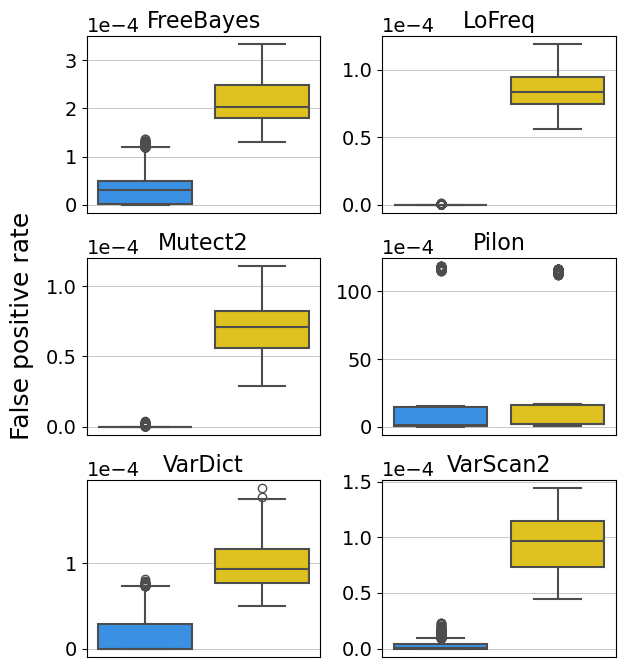

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(6,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    tool_genome_FPR_df = genome_FPR_df[genome_FPR_df.tool == tool]
    
    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=16)

    ax.grid(axis="y", linewidth=0.5, zorder=0)
    
    sns.boxplot(tool_genome_FPR_df, y="FPR", x="genome", hue="genome", palette=Rv_L1234_palette,
                linewidth=1.5, ax=ax)

    ax.set_xticks([])
    ax.set_xticklabels([])

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(14)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_genome_wide_FPR.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_genome_wide_FPR.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

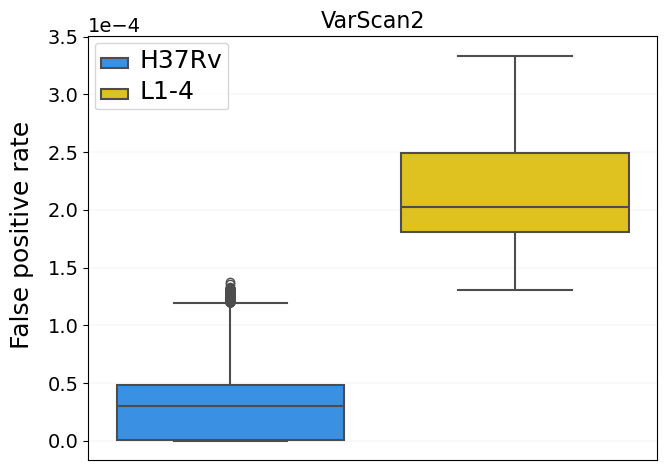

In [26]:
fig, ax = plt.subplots()

tool_genome_FPR_df = genome_FPR_df[genome_FPR_df.tool == "FB"]

ax.set_title(tool_name, fontsize=16)

ax.grid(axis="x", linewidth=0.5, zorder=0)
ax.grid(axis="y", linewidth=0.1, zorder=0)

sns.boxplot(tool_genome_FPR_df, y="FPR", x="genome", hue="genome", palette=Rv_L1234_palette,
            linewidth=1.5, ax=ax, legend=True)

ax.set_xticks([])
ax.set_xticklabels([])

ax.tick_params(labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("")

plt.setp(ax.get_legend().get_texts(), fontsize='18')
ax.get_legend().set_title("")

ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

ax.yaxis.get_offset_text().set_fontsize(14)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/genome_legend2.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/genome_legend2.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

# [done] H37Rv: FPR per tool

In [72]:
genome_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_genome_wide_FPR.csv")
print(genome_FPR_df.shape)
genome_FPR_df.head(2)

(21000, 5)


,tag,genome,tool,num_FP,FPR
0,sim1_h37rv_mutant_1_50_0.01,H37Rv,FB,145,0.000033
1,sim1_h37rv_mutant_1_50_0.01,H37Rv,LF,0,0.000000


In [73]:
Rv_genome_FPR_df = genome_FPR_df[genome_FPR_df.genome == "H37Rv"]
print(Rv_genome_FPR_df.shape)
Rv_genome_FPR_df.head(2)

(15000, 5)


,tag,genome,tool,num_FP,FPR
0,sim1_h37rv_mutant_1_50_0.01,H37Rv,FB,145,0.000033
1,sim1_h37rv_mutant_1_50_0.01,H37Rv,LF,0,0.000000


In [74]:
tool_FPR_summary_df = pd.DataFrame(columns=["tool", "min_num_FP", "median_num_FP", "mean_num_FP", "max_num_FP",
                                            "min_FPR", "median_FPR", "mean_FPR", "max_FPR"])
df_i = 0

for tool in tools:

    tool_df = Rv_genome_FPR_df[Rv_genome_FPR_df.tool == tool]
    
    num_FP_lst = tool_df.num_FP
    FPR_lst = tool_df.FPR
    
    tool_FPR_summary_df.loc[df_i] = [tool_mapping[tool], num_FP_lst.min(), num_FP_lst.median(), num_FP_lst.mean(), num_FP_lst.max(),
                                     FPR_lst.min(), FPR_lst.median(), FPR_lst.mean(), FPR_lst.max()]
    df_i += 1

tool_FPR_summary_df

,tool,min_num_FP,median_num_FP,mean_num_FP,max_num_FP,min_FPR,median_FPR,mean_FPR,max_FPR
0,FreeBayes,0,134.0,174.9056,606,0.00000,3.037494e-05,3.964736e-05,1.373672e-04
1,LoFreq,0,0.0,0.2124,4,0.00000,0.000000e+00,4.814654e-08,9.067145e-07
2,Mutect2,0,0.0,0.1600,16,0.00000,0.000000e+00,3.626858e-08,3.626858e-06
3,Pilon,46,481.0,11781.5212,52283,0.00001,1.090324e-04,2.670619e-03,1.185144e-02
4,VarDict,0,0.0,84.0864,358,0.00000,0.000000e+00,1.906059e-05,8.115095e-05
5,VarScan2,0,1.0,10.7220,103,0.00000,2.266786e-07,2.430448e-06,2.334790e-05


In [75]:
tool_FPR_summary_df.sort_values("median_FPR")

,tool,min_num_FP,median_num_FP,mean_num_FP,max_num_FP,min_FPR,median_FPR,mean_FPR,max_FPR
1,LoFreq,0,0.0,0.2124,4,0.00000,0.000000e+00,4.814654e-08,9.067145e-07
2,Mutect2,0,0.0,0.1600,16,0.00000,0.000000e+00,3.626858e-08,3.626858e-06
4,VarDict,0,0.0,84.0864,358,0.00000,0.000000e+00,1.906059e-05,8.115095e-05
5,VarScan2,0,1.0,10.7220,103,0.00000,2.266786e-07,2.430448e-06,2.334790e-05
0,FreeBayes,0,134.0,174.9056,606,0.00000,3.037494e-05,3.964736e-05,1.373672e-04
3,Pilon,46,481.0,11781.5212,52283,0.00001,1.090324e-04,2.670619e-03,1.185144e-02


In [39]:
tool_FPR_summary_df["mean_FPR"]

0    3.964736e-05
1    4.814654e-08
2    3.626858e-08
3    2.670619e-03
4    1.906059e-05
5    2.430448e-06
Name: mean_FPR, dtype: float64

# [done] L1234: FPR per tool

In [40]:
genome_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_genome_wide_FPR.csv")
print(genome_FPR_df.shape)
genome_FPR_df.head(2)

(21000, 5)


,tag,genome,tool,num_FP,FPR
0,sim1_h37rv_mutant_1_50_0.01,H37Rv,FB,145,0.000033
1,sim1_h37rv_mutant_1_50_0.01,H37Rv,LF,0,0.000000


In [41]:
L1234_genome_FPR_df = genome_FPR_df[genome_FPR_df.genome == "L1-4"]
print(L1234_genome_FPR_df.shape)
L1234_genome_FPR_df.head(2)

(6000, 5)


,tag,genome,tool,num_FP,FPR
15000,sim1_L1_mutant_50_0.01,L1-4,FB,864,0.000196
15001,sim1_L1_mutant_50_0.01,L1-4,LF,358,0.000081


In [42]:
tool_FPR_summary_df = pd.DataFrame(columns=["tool", "min_num_FP", "median_num_FP", "mean_num_FP", "max_num_FP",
                                            "min_FPR", "median_FPR", "mean_FPR", "max_FPR"])
df_i = 0

for tool in tools:
    
    tool_df = L1234_genome_FPR_df[L1234_genome_FPR_df.tool == tool]
    
    num_FP_lst = tool_df.num_FP
    FPR_lst = tool_df.FPR
    
    tool_FPR_summary_df.loc[df_i] = [tool_mapping[tool], num_FP_lst.min(), num_FP_lst.median(), num_FP_lst.mean(), num_FP_lst.max(),
                                     FPR_lst.min(), FPR_lst.median(), FPR_lst.mean(), FPR_lst.max()]
    df_i += 1

tool_FPR_summary_df

,tool,min_num_FP,median_num_FP,mean_num_FP,max_num_FP,min_FPR,median_FPR,mean_FPR,max_FPR
0,FreeBayes,576,894.0,946.620,1472,0.000131,0.000203,0.000215,0.000334
1,LoFreq,246,370.0,375.653,525,0.000056,0.000084,0.000085,0.000119
2,Mutect2,127,311.0,306.165,503,0.000029,0.000070,0.000069,0.000114
3,Pilon,274,967.5,11958.071,51526,0.000062,0.000219,0.002711,0.011680
4,VarDict,221,410.0,428.948,828,0.000050,0.000093,0.000097,0.000188
5,VarScan2,197,428.0,418.559,636,0.000045,0.000097,0.000095,0.000144


In [43]:
tool_FPR_summary_df["mean_FPR"]

0    0.000215
1    0.000085
2    0.000069
3    0.002711
4    0.000097
5    0.000095
Name: mean_FPR, dtype: float64

In [33]:
0.000070

7e-05

# [done] Percentage of total FP that are LM

In [34]:
percent_LM_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_percent_LM_FP.csv")
print(percent_LM_FPR_df.shape)
percent_LM_FPR_df.head(2)

(13921, 6)


,tag,genome,tool,num_FP,num_LM_FP,percent_LM_FP
0,sim1_h37rv_mutant_1_50_0.01,H37Rv,FB,145,12,8.275862
1,sim1_h37rv_mutant_1_50_0.01,H37Rv,MT,7,1,14.285714


In [35]:
tool_LM_FP_summary_df = pd.DataFrame(columns=["tool", "Rv_median_FP", "L1234_median_FP", "Rv_median_LM_percent", "L1234_median_LM_percent"])
df_i = 0

for tool in tools:

    tool_df = percent_LM_FPR_df[percent_LM_FPR_df.tool == tool]

    Rv_percent_LM_FPR_df = tool_df[tool_df.genome == "H37Rv"]
    Rv_FP_lst = Rv_percent_LM_FPR_df.num_FP
    Rv_median_FP = Rv_FP_lst.median()
    Rv_percent_LM_FP_lst = Rv_percent_LM_FPR_df.percent_LM_FP
    Rv_median_LM_percent = Rv_percent_LM_FP_lst.median()

    L1234_percent_LM_FPR_df = tool_df[tool_df.genome == "L1-4"]
    L1234_FP_lst = L1234_percent_LM_FPR_df.num_FP
    L1234_median_FP = L1234_FP_lst.median()
    L1234_percent_LM_FP_lst = L1234_percent_LM_FPR_df.percent_LM_FP
    L1234_median_LM_percent = L1234_percent_LM_FP_lst.median()

    tool_LM_FP_summary_df.loc[df_i] = [tool, Rv_median_FP, L1234_median_FP, Rv_median_LM_percent, L1234_median_LM_percent]
    df_i += 1

tool_LM_FP_summary_df

,tool,Rv_median_FP,L1234_median_FP,Rv_median_LM_percent,L1234_median_LM_percent
0,FB,141.0,894.0,13.537751,79.635738
1,LF,1.0,370.0,0.000000,95.812163
2,MT,2.0,311.0,0.000000,76.129407
3,PL,481.0,967.5,10.914931,53.140040
4,VD,130.0,410.0,10.000000,95.260770
5,VS,13.0,428.0,100.000000,97.400386


In [36]:
tool_LM_FP_summary_df.to_csv("./data/FP_characteristics/ISS_tool_LM_FP_summary.csv", index=False)

# [done] Percentage of FP at AF = 1%

In [37]:
percent_AF1_FP_df = pd.read_csv("./data/FP_characteristics/ISS_percent_AF1_FP.csv")
print(percent_AF1_FP_df.shape)
percent_AF1_FP_df.head(2)

(13921, 6)


,tag,genome,tool,num_FP,num_AF1_FP,percent_AF1_FP
0,sim1_h37rv_mutant_1_50_0.01,H37Rv,FB,145,0,0.0
1,sim1_h37rv_mutant_1_50_0.01,H37Rv,MT,7,0,0.0


In [38]:
tool_AF1_FP_summary_df = pd.DataFrame(columns=["tool", "Rv_median_FP", "L1234_median_FP", "Rv_median_AF1_percent", "L1234_median_AF1_percent"])
df_i = 0

for tool in tools:

    tool_df = percent_AF1_FP_df[percent_AF1_FP_df.tool == tool]

    Rv_percent_AF1_FP_df = tool_df[tool_df.genome == "H37Rv"]
    Rv_FP_lst = Rv_percent_AF1_FP_df.num_FP
    Rv_median_FP = Rv_FP_lst.median()
    Rv_percent_AF1_FP_lst = Rv_percent_AF1_FP_df.percent_AF1_FP
    Rv_median_AF1_percent = Rv_percent_AF1_FP_lst.median()

    L1234_percent_AF1_FP_df = tool_df[tool_df.genome == "L1-4"]
    L1234_FP_lst = L1234_percent_AF1_FP_df.num_FP
    L1234_median_FP = L1234_FP_lst.median()
    L1234_percent_AF1_FP_lst = L1234_percent_AF1_FP_df.percent_AF1_FP
    L1234_median_AF1_percent = L1234_percent_AF1_FP_lst.median()

    tool_AF1_FP_summary_df.loc[df_i] = [tool, Rv_median_FP, L1234_median_FP, Rv_median_AF1_percent, L1234_median_AF1_percent]
    df_i += 1

tool_AF1_FP_summary_df

,tool,Rv_median_FP,L1234_median_FP,Rv_median_AF1_percent,L1234_median_AF1_percent
0,FB,141.0,894.0,0.000000,0.00000
1,LF,1.0,370.0,0.000000,0.00000
2,MT,2.0,311.0,0.000000,0.00000
3,PL,481.0,967.5,99.963613,45.71805
4,VD,130.0,410.0,0.000000,0.00000
5,VS,13.0,428.0,0.000000,0.00000


In [39]:
tool_AF1_FP_summary_df.to_csv("./data/FP_characteristics/ISS_tool_AF1_FP_summary.csv", index=False)

In [40]:
for tool in tools:
    tool_df = tool_AF1_FP_summary_df[tool_AF1_FP_summary_df.tool == tool]
    print(tool, tool_df["Rv_median_FP"].values[0] + tool_df["L1234_median_FP"].values[0])

FB 1035.0
LF 371.0
MT 313.0
PL 1448.5
VD 540.0
VS 441.0


# [done] Percentage of FP with FP < 5% and FP ≥ 5% per LM region

In [95]:
AF5_tool_FP_stats_df = pd.read_csv("./data/FP_characteristics/ISS_AF5_tool_FP_stats.csv")
print(AF5_tool_FP_stats_df.shape)
AF5_tool_FP_stats_df.head(2)

(21000, 9)


,tag,genome,tool,LM_tool_FP,LM_tool_FP_underAF5,LM_tool_FP_AF5andOver,nonLM_tool_FP,nonLM_tool_FP_underAF5,nonLM_tool_FP_AF5andOver
0,sim1_h37rv_mutant_1_50_0.01,H37Rv,FB,12,12,0,133,132,1
1,sim1_h37rv_mutant_1_50_0.01,H37Rv,LF,0,0,0,0,0,0


In [97]:
for tool in tools:

    LM_tool_FP = AF5_tool_FP_stats_df[underAF5_tool_FP_stats_df.tool == tool]["LM_tool_FP"].sum()
    LM_tool_FP_underAF5 = AF5_tool_FP_stats_df[underAF5_tool_FP_stats_df.tool == tool]["LM_tool_FP_underAF5"].sum()
    LM_tool_FP_AF5andOver = AF5_tool_FP_stats_df[underAF5_tool_FP_stats_df.tool == tool]["LM_tool_FP_AF5andOver"].sum()

    LM_percent_under_AF5 = (LM_tool_FP_underAF5/LM_tool_FP)*100
    LM_percent_AF5andOver = (LM_tool_FP_AF5andOver/LM_tool_FP)*100

    nonLM_tool_FP = AF5_tool_FP_stats_df[underAF5_tool_FP_stats_df.tool == tool]["nonLM_tool_FP"].sum()
    nonLM_tool_FP_underAF5 = AF5_tool_FP_stats_df[underAF5_tool_FP_stats_df.tool == tool]["nonLM_tool_FP_underAF5"].sum()
    nonLM_tool_FP_AF5andOver = AF5_tool_FP_stats_df[underAF5_tool_FP_stats_df.tool == tool]["nonLM_tool_FP_AF5andOver"].sum()

    nonLM_percent_under_AF5 = (nonLM_tool_FP_underAF5/nonLM_tool_FP)*100
    nonLM_percent_AF5andOver = (nonLM_tool_FP_AF5andOver/LM_tool_FP)*100

    print(tool, "AF < 5%", LM_percent_under_AF5, nonLM_percent_under_AF5)
    print(tool, "AF ≥ 5%", LM_percent_AF5andOver, nonLM_percent_AF5andOver)

FB AF < 5% 41.651770613877844 96.40755224759262
FB AF ≥ 5% 58.34822938612215 2.705739720456725
LF AF < 5% 11.619882469535602 59.49162912286556
LF AF ≥ 5% 88.3801175304644 2.033193283175835
MT AF < 5% 10.93861297769539 30.390783334920222
MT AF ≥ 5% 89.0613870223046 21.95961312358933
PL AF < 5% 92.66468381845552 99.94833996940754
PL AF ≥ 5% 7.3353161815444805 0.4355509805305865
VD AF < 5% 22.935961621560626 96.60376674461182
VD AF ≥ 5% 77.06403837843938 2.5783793751668598
VS AF < 5% 19.416436776018177 42.89066510229523
VS AF ≥ 5% 80.58356322398183 1.8039177535803876


# [done] FP AF distribution per LM and DR regions combined

In [35]:
figure_region_pal = {"DR": DR_col, "LM": LM_col, "non-DR": "grey", "non-LM": "grey"}

## H37Rv

In [36]:
with open(f"./data/FP_characteristics/ISS_H37Rv_DR_region_AF_distr.pkl", "rb") as in_f:
    Rv_DR_region_AF_distr_dict = pickle.load(in_f)

with open(f"./data/FP_characteristics/ISS_H37Rv_region_AF_distr.pkl", "rb") as in_f:
    Rv_LM_region_AF_distr_dict = pickle.load(in_f)

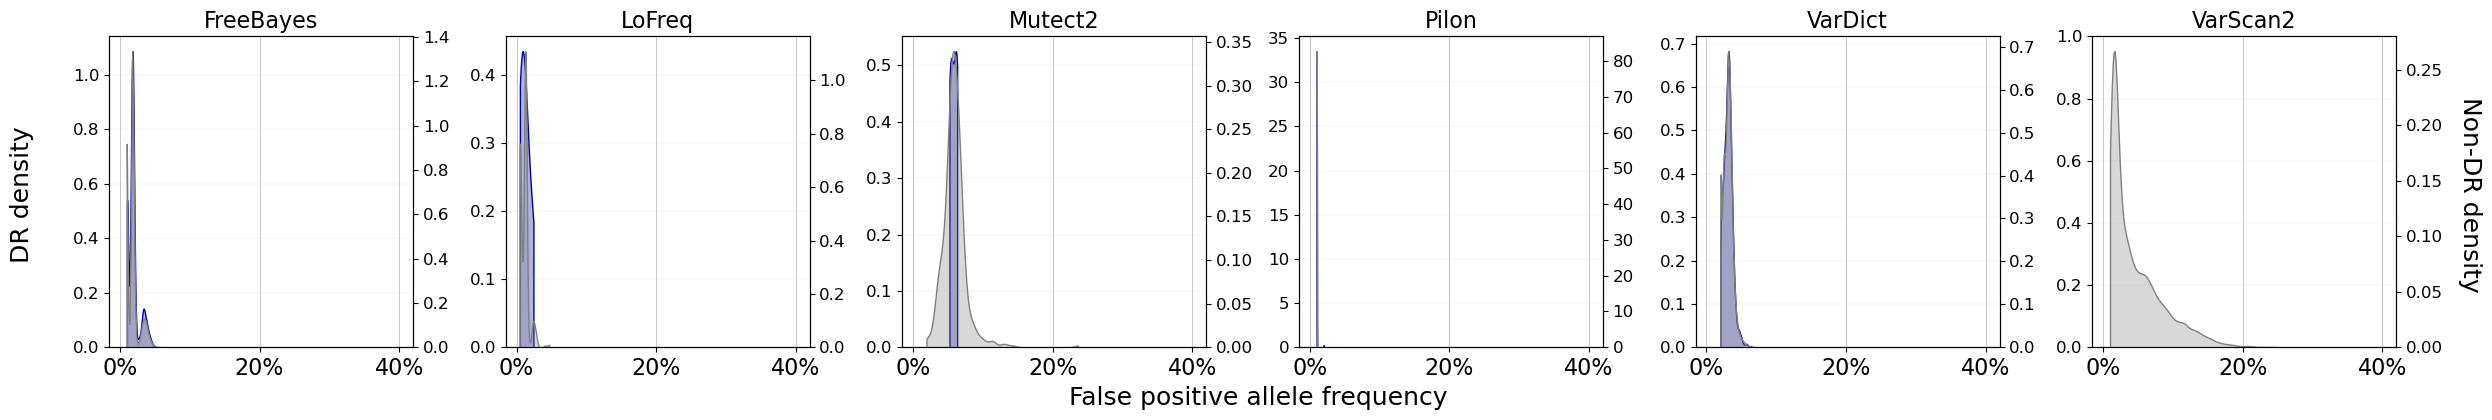

In [37]:
fig, axs = plt.subplots(1, 6, sharex=True, figsize=(24,4))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    DR_tool_dict = Rv_DR_region_AF_distr_dict[tool]["DR"]
    nonDR_tool_dict = Rv_DR_region_AF_distr_dict[tool]["non-DR"]

    ax = axs[tool_i]

    ax.set_title(f"{tool_name}", fontsize=16)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)

    ax_right = ax.twinx()

    sns.kdeplot(DR_tool_dict, color=figure_region_pal["DR"], fill=True, alpha=0.3, cut=0, ax=ax)
    sns.kdeplot(nonDR_tool_dict, color=figure_region_pal["non-DR"], fill=True, alpha=0.3, cut=0, ax=ax_right)

    ax.tick_params(axis="x", labelsize=16)
    
    ax.tick_params(axis="y", labelsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax_right.tick_params(axis="y", labelsize=12)
    ax_right.set_ylabel("")

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

fig.text(0.5, -0.025, "False positive allele frequency", ha='center', fontsize=18)
fig.text(-0.02, 0.5, "DR density", rotation='vertical', va='center', fontsize=18)
fig.text(1, 0.5, "Non-DR density", rotation=270, va='center', fontsize=18)

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_H37Rv_FP_AF_distribution_by_DR_region.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_H37Rv_FP_AF_distribution_by_DR_region.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

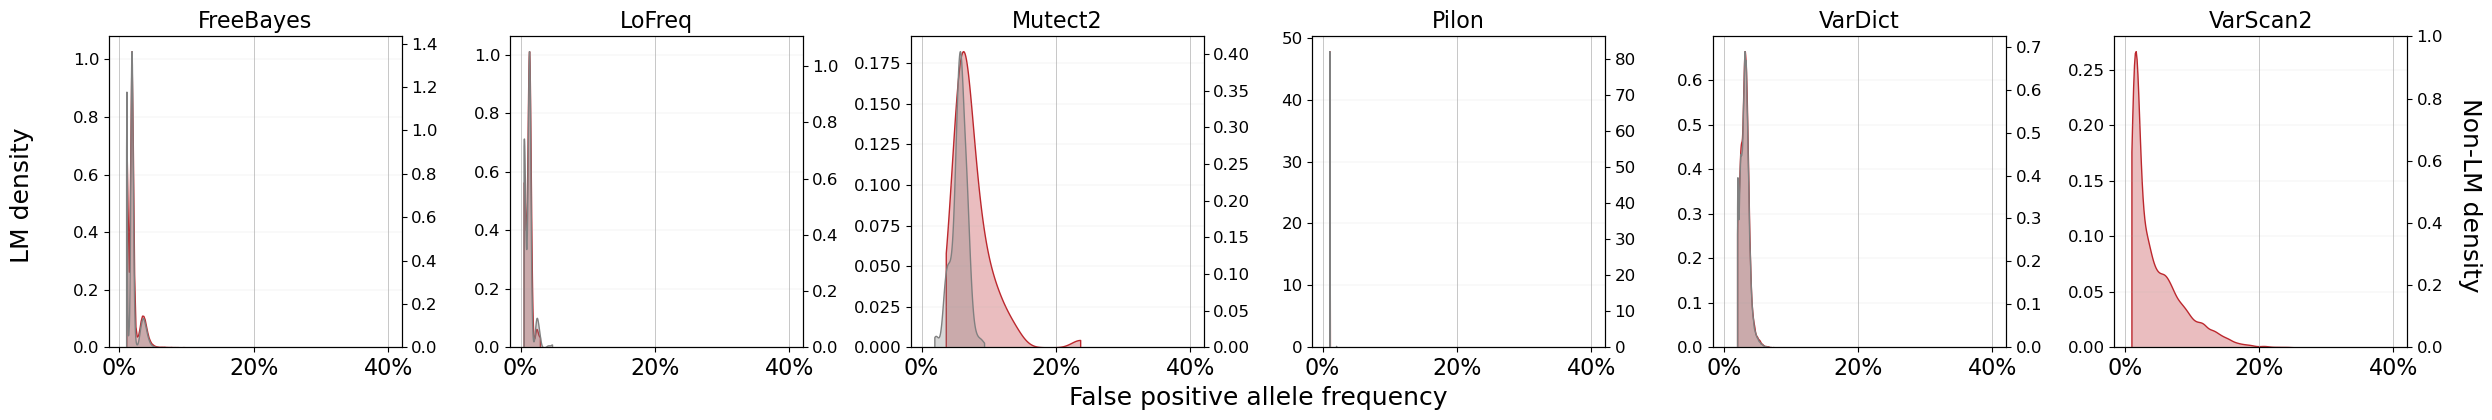

In [38]:
fig, axs = plt.subplots(1, 6, sharex=True, figsize=(24,4))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    LM_tool_dict = Rv_LM_region_AF_distr_dict[tool]["LM"]
    nonLM_tool_dict = Rv_LM_region_AF_distr_dict[tool]["non-LM"]

    ax = axs[tool_i]

    ax.set_title(f"{tool_name}", fontsize=16)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)

    ax_right = ax.twinx()

    sns.kdeplot(LM_tool_dict, color=figure_region_pal["LM"], fill=True, alpha=0.3, cut=0, ax=ax)
    sns.kdeplot(nonLM_tool_dict, color=figure_region_pal["non-LM"], fill=True, alpha=0.3, cut=0, ax=ax_right)

    ax.tick_params(axis="x", labelsize=16)
    
    ax.tick_params(axis="y", labelsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax_right.tick_params(axis="y", labelsize=12)
    ax_right.set_ylabel("")

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

fig.text(0.5, -0.025, "False positive allele frequency", ha='center', fontsize=18)
fig.text(-0.02, 0.5, "LM density", rotation='vertical', va='center', fontsize=18)
fig.text(1, 0.5, "Non-LM density", rotation=270, va='center', fontsize=18)

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_H37Rv_FP_AF_distribution_by_LM_region.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_H37Rv_FP_AF_distribution_by_LM_region.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

## L1234

In [23]:
with open(f"./data/FP_characteristics/ISS_L1234_DR_region_AF_distr.pkl", "rb") as in_f:
    L1234_DR_region_AF_distr_dict = pickle.load(in_f)

with open(f"./data/FP_characteristics/ISS_L1234_region_AF_distr.pkl", "rb") as in_f:
    L1234_LM_region_AF_distr_dict = pickle.load(in_f)

In [30]:
for tool in tools:

    print(tool, np.max(L1234_DR_region_AF_distr_dict[tool]["DR"]))

FB 5.88235294117647
LF 5.263199999999999
MT 7.9
PL 6.0
VD 6.0
VS 1.73


In [32]:
for tool in tools:

    nonLM_AFs = np.array(L1234_LM_region_AF_distr_dict[tool]["non-LM"])
    nonLM_AFs_under10 = nonLM_AFs[nonLM_AFs < 10]

    print(tool, (len(nonLM_AFs_under10)/len(nonLM_AFs))*100)

FB 93.72560981514297
LF 78.12303649968584
MT 61.95225928101985
PL 99.95177504099169
VD 97.26618375730945
VS 60.49717679841608


In [34]:
for tool in tools:

    nonLM_AFs = np.array(L1234_LM_region_AF_distr_dict[tool]["non-LM"])
    nonLM_AFs_over10 = nonLM_AFs[nonLM_AFs > 10]

    print(tool, (len(nonLM_AFs_over10)/len(nonLM_AFs))*100)

FB 6.25211825426798
LF 21.73987547838008
MT 37.68428819325836
PL 0.043375682090969946
VD 2.698341858628858
VS 39.312165432279826


In [33]:
for tool in tools:

    LM_AFs = np.array(L1234_LM_region_AF_distr_dict[tool]["LM"])
    LM_AFs_over10 = LM_AFs[LM_AFs > 10]

    print(tool, (len(LM_AFs_over10)/len(LM_AFs))*100)

FB 46.54389648714602
LF 71.37982833816376
MT 71.1865498029857
PL 14.662679718731203
VD 62.73374302101236
VS 68.48380675784472


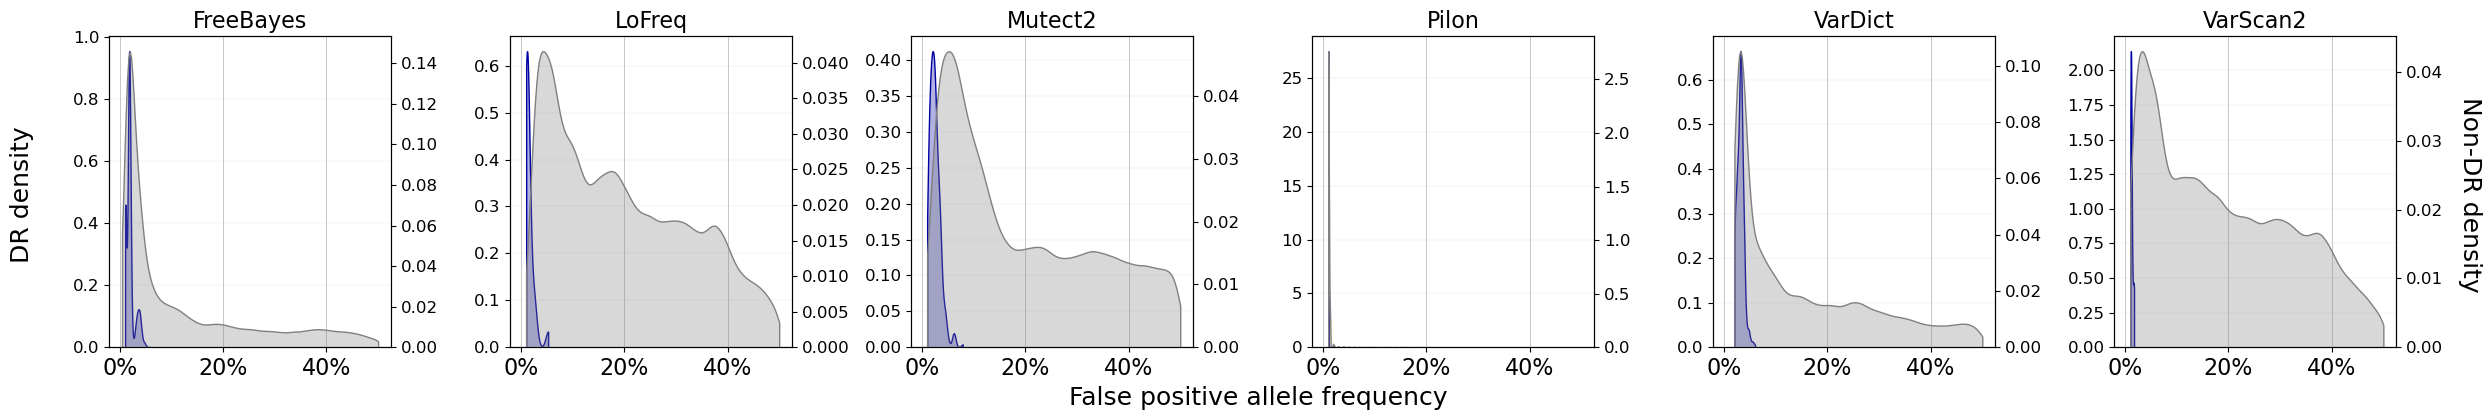

In [28]:
fig, axs = plt.subplots(1, 6, sharex=True, figsize=(24,4))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    DR_tool_dict = L1234_DR_region_AF_distr_dict[tool]["DR"]
    nonDR_tool_dict = L1234_DR_region_AF_distr_dict[tool]["non-DR"]

    ax = axs[tool_i]

    ax.set_title(f"{tool_name}", fontsize=16)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)

    ax_right = ax.twinx()

    sns.kdeplot(DR_tool_dict, color=figure_region_pal["DR"], fill=True, alpha=0.3, cut=0, ax=ax)
    sns.kdeplot(nonDR_tool_dict, color=figure_region_pal["non-DR"], fill=True, alpha=0.3, cut=0, ax=ax_right)

    ax.tick_params(axis="x", labelsize=16)
    
    ax.tick_params(axis="y", labelsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax_right.tick_params(axis="y", labelsize=12)
    ax_right.set_ylabel("")

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

fig.text(0.5, -0.025, "False positive allele frequency", ha='center', fontsize=18)
fig.text(-0.02, 0.5, "DR density", rotation='vertical', va='center', fontsize=18)
fig.text(1, 0.5, "Non-DR density", rotation=270, va='center', fontsize=18)

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_FP_AF_distribution_by_DR_region.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_FP_AF_distribution_by_DR_region.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

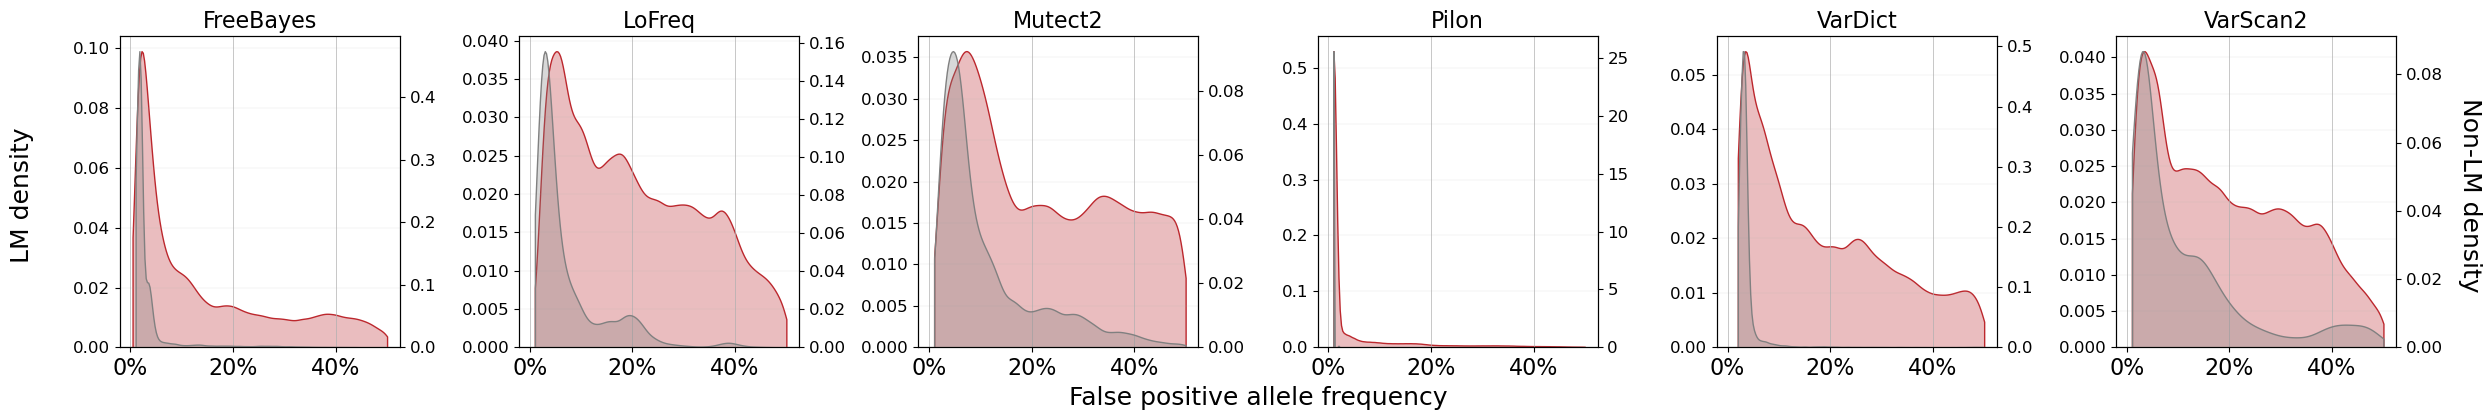

In [29]:
fig, axs = plt.subplots(1, 6, sharex=True, figsize=(24,4))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    LM_tool_dict = L1234_LM_region_AF_distr_dict[tool]["LM"]
    nonLM_tool_dict = L1234_LM_region_AF_distr_dict[tool]["non-LM"]

    ax = axs[tool_i]

    ax.set_title(f"{tool_name}", fontsize=16)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)

    ax_right = ax.twinx()

    sns.kdeplot(LM_tool_dict, color=figure_region_pal["LM"], fill=True, alpha=0.3, cut=0, ax=ax)
    sns.kdeplot(nonLM_tool_dict, color=figure_region_pal["non-LM"], fill=True, alpha=0.3, cut=0, ax=ax_right)

    ax.tick_params(axis="x", labelsize=16)
    
    ax.tick_params(axis="y", labelsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax_right.tick_params(axis="y", labelsize=12)
    ax_right.set_ylabel("")

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

fig.text(0.5, -0.025, "False positive allele frequency", ha='center', fontsize=18)
fig.text(-0.02, 0.5, "LM density", rotation='vertical', va='center', fontsize=18)
fig.text(1, 0.5, "Non-LM density", rotation=270, va='center', fontsize=18)

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_FP_AF_distribution_by_LM_region.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_FP_AF_distribution_by_LM_region.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

# [done] FPR per depth

In [98]:
depth_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_FPR_by_depth.csv")
print(depth_FPR_df.shape)
depth_FPR_df.head(2)

(21000, 6)


,tag,depth,genome,tool,num_FP,FPR
0,sim1_h37rv_mutant_1_50_0.01,50,H37Rv,FB,145,0.000033
1,sim1_h37rv_mutant_1_50_0.01,50,H37Rv,LF,0,0.000000


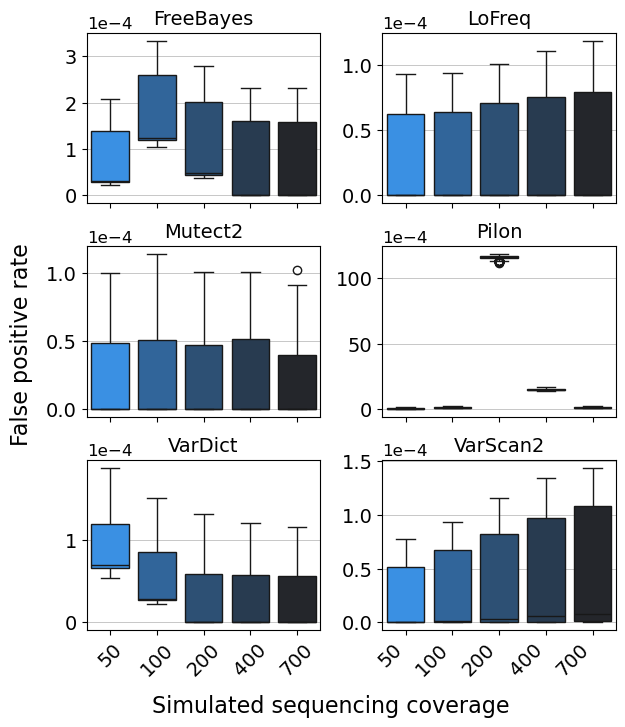

In [103]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]
    
    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=14)

    tool_depth_FPR_df = depth_FPR_df[depth_FPR_df.tool == tool]

    ax.grid(axis="y", linewidth=0.5, zorder=0)
    
    sns.boxplot(tool_depth_FPR_df, x="depth", y="FPR", hue="depth", palette=depth_colors, fill=True, legend=False, 
                ax=ax)

    ax.tick_params(labelsize=14)

    ax.tick_params(axis='x', labelrotation=45, labelsize=14) 
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(12)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontdict={"horizontalalignment": "right"})

fig.text(0.5, -0.025, "Simulated sequencing coverage", ha='center', fontsize=16)
fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_FPR_per_depth.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_FPR_per_depth.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()
plt.close()

# [done] L1234: FPR in DR vs non-DR regions

## All AF

In [5]:
L1234_region_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_L1234_region_FPR.csv")
print(L1234_region_FPR_df.shape)
L1234_region_FPR_df.head(2)

(24000, 5)


,tag,region,tool,num_FP,FPR
0,sim1_L1_mutant_50_0.01,DR,FB,0,0.0
1,sim1_L1_mutant_50_0.01,HT,FB,0,0.0


In [6]:
L1234_region_FPR_summary_df = pd.DataFrame(columns=["region"] + tools)
L1234_region_FPR_summary_df["region"] = ["DR", "nonDR"]
L1234_region_FPR_summary_df.set_index("region", inplace=True)

DR_df = L1234_region_FPR_df[L1234_region_FPR_df.region == "DR"]
for tool in tools:
    tool_DR_df = DR_df[DR_df.tool == tool]
    median_tool_DR_FPR = tool_DR_df.FPR.median()
    L1234_region_FPR_summary_df.loc["DR", tool] = median_tool_DR_FPR

nonDR_df = L1234_region_FPR_df[L1234_region_FPR_df.region != "DR"]
for tool in tools:
    tool_nonDR_df = nonDR_df[nonDR_df.tool == tool]
    median_tool_nonDR_FPR = tool_nonDR_df.FPR.median()
    L1234_region_FPR_summary_df.loc["nonDR", tool] = median_tool_nonDR_FPR

L1234_region_FPR_summary_df

,FB,LF,MT,PL,VD,VS
region,,,,,,
DR,0.000023,0.0,0.0,0.000113,0.0,0.0
nonDR,0.000065,0.000006,0.000021,0.001413,0.000032,0.000005


In [27]:
DR_df = L1234_region_FPR_df[L1234_region_FPR_df.region == "DR"]
all_DR_FPRs = list(DR_df["FPR"].values)

nonDR_df = L1234_region_FPR_df[L1234_region_FPR_df.region != "DR"]
all_nonDR_FPRs = list(nonDR_df["FPR"].values)

In [28]:
np.median(all_DR_FPRs), np.median(all_nonDR_FPRs)

(np.float64(0.0), np.float64(4.424911559485048e-05))

In [23]:
for tool in tools:

    print(tool, L1234_region_FPR_summary_df.loc["DR", tool]/L1234_region_FPR_summary_df.loc["nonDR", tool])

FB 0.3474324342389634
LF 0.0
MT 0.0
PL 0.07980292924916578
VD 0.0
VS 0.0


In [7]:
L1234_region_FPR_summary_df.to_csv("./data/FP_characteristics/ISS_L1234_DR_vs_nonDR_FPR_summary.csv", index=True)

In [19]:
DR_region_mapping = {"DR": "DR",
                     "HT": "Non-DR",
                     "other": "Non-DR",
                     "LM": "Non-DR"}

In [20]:
DR_region_pal = {"DR": DR_col, "Non-DR": "lightgrey"}

In [34]:
plot_df = L1234_region_FPR_df.copy(deep=True)

plot_df["tool_name"] = plot_df["tool"].map(tool_mapping)
plot_df["DR_region"] = plot_df["region"].map(DR_region_mapping)

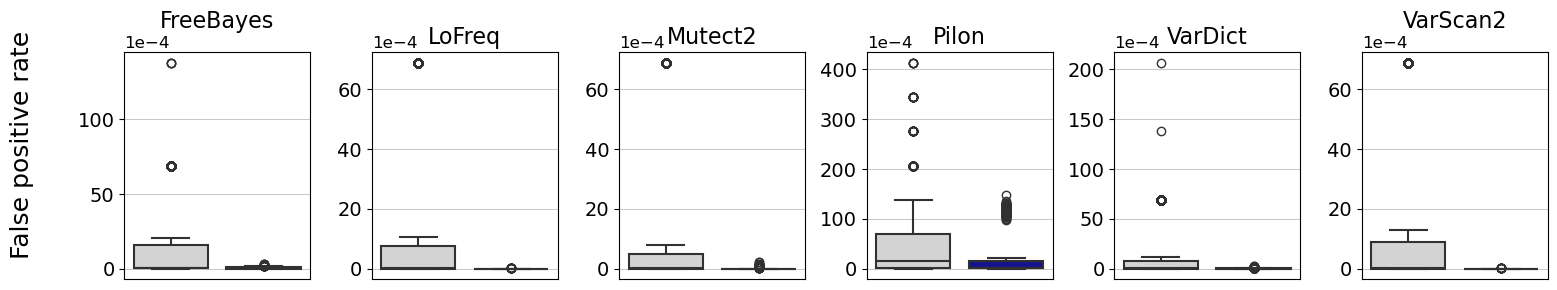

In [33]:
fig, axs = plt.subplots(1, 6, figsize=(15,3))

for tool_i in range(len(tools)):
    
    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    ax = axs[tool_i]

    ax.set_title(tool_name, fontsize=16)

    ax.grid(axis="y", linewidth=0.5, zorder=0)

    tool_plot_df = plot_df[plot_df.tool == tool]
    
    sns.boxplot(tool_plot_df, x="DR_region", y="FPR", order=["Non-DR", "DR"], hue="DR_region", palette=DR_region_pal,
                linewidth=1.5, legend=False, ax=ax)

    ax.set_xticks([])
    ax.set_xticklabels([])

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(12)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_FPR_DR_vs_nonDR.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_FPR_DR_vs_nonDR.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

In [35]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

p1 = "DR"
p2 = "Non-DR"

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "test_stat", "p_val"])
df_i = 0

for tool in tools:

    tool_df = plot_df[plot_df.tool == tool]

    p1_tool_values = tool_df[tool_df.DR_region == p1]["FPR"].values
    p2_tool_values = tool_df[tool_df.DR_region == p2]["FPR"].values

    p1_mean = np.mean(p1_tool_values)
    p2_mean = np.mean(p2_tool_values)

    test_result = mannwu(p1_tool_values, p2_tool_values)

    all_tools_results_df.loc[df_i] = [tool, p1, p2, test_result[0], test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df


,tool,p1,p2,test_stat,p_val,corrected_p_val,decision
0,FB,DR,Non-DR,936011.0,3.802362e-73,4.562835e-73,1
1,LF,DR,Non-DR,409000.0,1.600307e-283,4.800922e-283,1
2,MT,DR,Non-DR,555210.0,5.608194e-215,1.121639e-214,1
3,PL,DR,Non-DR,1210487.5,4.714164e-20,4.714164e-20,1
4,VD,DR,Non-DR,788216.0,6.634323e-118,9.951484e-118,1
5,VS,DR,Non-DR,400673.0,9.198558e-289,5.519135e-288,1


## For AF ≥ 5%

In [8]:
L1234_region_FPR_AF5andOver_df = pd.read_csv("./data/FP_characteristics/ISS_L1234_region_AF5andOver_FPR.csv")
print(L1234_region_FPR_AF5andOver_df.shape)
L1234_region_FPR_AF5andOver_df.head(2)

(24000, 5)


,tag,region,tool,num_FP,FPR
0,sim1_L1_mutant_50_0.01,DR,FB,0,0.0
1,sim1_L1_mutant_50_0.01,HT,FB,0,0.0


In [9]:
L1234_region_FPR_AF5andOver_summary_df = pd.DataFrame(columns=["region"] + tools)
L1234_region_FPR_AF5andOver_summary_df["region"] = ["DR", "nonDR"]
L1234_region_FPR_AF5andOver_summary_df.set_index("region", inplace=True)

DR_df = L1234_region_FPR_AF5andOver_df[L1234_region_FPR_AF5andOver_df.region == "DR"]
for tool in tools:
    tool_DR_df = DR_df[DR_df.tool == tool]
    median_tool_DR_FPR = tool_DR_df.FPR.median()
    L1234_region_FPR_AF5andOver_summary_df.loc["DR", tool] = median_tool_DR_FPR

nonDR_df = L1234_region_FPR_AF5andOver_df[L1234_region_FPR_AF5andOver_df.region != "DR"]
for tool in tools:
    tool_nonDR_df = nonDR_df[nonDR_df.tool == tool]
    median_tool_nonDR_FPR = tool_nonDR_df.FPR.median()
    L1234_region_FPR_AF5andOver_summary_df.loc["nonDR", tool] = median_tool_nonDR_FPR

L1234_region_FPR_AF5andOver_summary_df

,FB,LF,MT,PL,VD,VS
region,,,,,,
DR,0.0,0.0,0.0,0.0,0.0,0.0
nonDR,0.000007,0.000002,0.000015,0.000004,0.000002,0.000003


In [10]:
L1234_region_FPR_AF5andOver_summary_df.to_csv("./data/FP_characteristics/ISS_L1234_DR_vs_nonDR_FPR_AF5andOver_summary.csv", index=True)

In [11]:
DR_region_mapping = {"DR": "DR",
                     "HT": "Non-DR",
                     "other": "Non-DR",
                     "LM": "Non-DR"}

In [16]:
DR_region_pal = {"DR": DR_col, "Non-DR": "lightgrey"}

In [15]:
plot_df = L1234_region_FPR_AF5andOver_df.copy(deep=True)

plot_df["tool_name"] = plot_df["tool"].map(tool_mapping)
plot_df["DR_region"] = plot_df["region"].map(DR_region_mapping)

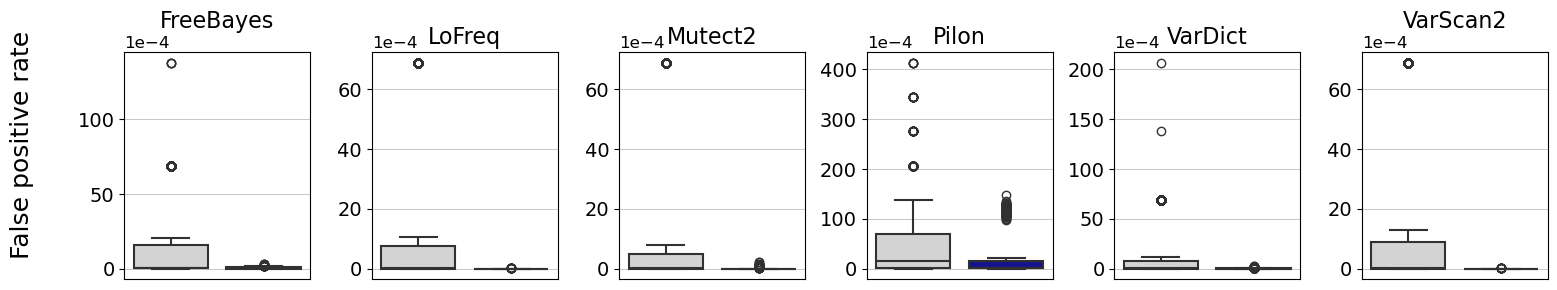

In [32]:
fig, axs = plt.subplots(1, 6, figsize=(15,3))

for tool_i in range(len(tools)):
    
    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    ax = axs[tool_i]

    ax.set_title(tool_name, fontsize=16)

    ax.grid(axis="y", linewidth=0.5, zorder=0)

    tool_plot_df = plot_df[plot_df.tool == tool]
    
    sns.boxplot(tool_plot_df, x="DR_region", y="FPR", order=["Non-DR", "DR"], hue="DR_region", palette=DR_region_pal,
                linewidth=1.5, legend=False, ax=ax)

    ax.set_xticks([])
    ax.set_xticklabels([])

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(12)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_FPR_AF5andOver_DR_vs_nonDR.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_FPR_AF5andOver_DR_vs_nonDR.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

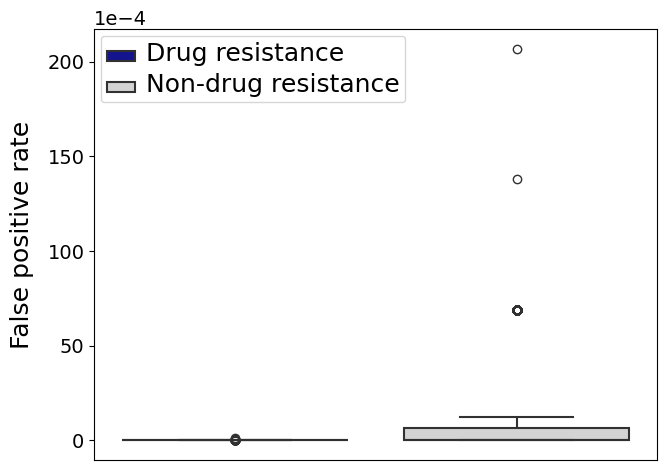

In [18]:
# legend

fig, ax = plt.subplots()

legend_df = plot_df.copy(deep=True)
region_name_mapping = {"DR": "Drug resistance",
                       "Non-DR": "Non-drug resistance"}
legend_df["DR_region_name"] = legend_df["DR_region"].map(region_name_mapping)

DR_region_name_pal = {"Drug resistance": DR_region_pal["DR"], "Non-drug resistance": DR_region_pal["Non-DR"]}

tool_plot_df = plot_df[plot_df.tool == "FB"]
    
sns.boxplot(legend_df, x="DR_region_name", y="FPR", hue="DR_region_name", palette=DR_region_name_pal,
            linewidth=1.5, legend=True, ax=ax)

ax.set_xticks([])
ax.set_xticklabels([])

ax.tick_params(labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("")

ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

ax.yaxis.get_offset_text().set_fontsize(14)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.setp(ax.get_legend().get_texts(), fontsize='18')
ax.get_legend().set_title("")

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/DR_region_legend.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/DR_region_legend.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

# [done] L1234: FPR in LM vs non-LM regions

In [29]:
L1234_region_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_L1234_region_FPR.csv")
print(L1234_region_FPR_df.shape)
L1234_region_FPR_df.head(2)

(24000, 5)


,tag,region,tool,num_FP,FPR
0,sim1_L1_mutant_50_0.01,DR,FB,0,0.0
1,sim1_L1_mutant_50_0.01,HT,FB,0,0.0


In [43]:
L1234_region_FPR_summary_df = pd.DataFrame(columns=["region"] + tools)
L1234_region_FPR_summary_df["region"] = ["LM", "nonLM"]
L1234_region_FPR_summary_df.set_index("region", inplace=True)

LM_df = L1234_region_FPR_df[L1234_region_FPR_df.region == "LM"]
for tool in tools:
    tool_LM_df = LM_df[LM_df.tool == tool]
    median_tool_LM_FPR = tool_LM_df.FPR.median()
    L1234_region_FPR_summary_df.loc["LM", tool] = median_tool_LM_FPR

nonLM_df = L1234_region_FPR_df[L1234_region_FPR_df.region != "LM"]
for tool in tools:
    tool_nonLM_df = nonLM_df[nonLM_df.tool == tool]
    median_tool_nonLM_FPR = tool_nonLM_df.FPR.median()
    L1234_region_FPR_summary_df.loc["nonLM", tool] = median_tool_nonLM_FPR

L1234_region_FPR_summary_df

,FB,LF,MT,PL,VD,VS
region,,,,,,
LM,0.001602,0.00076,0.000527,0.001492,0.000736,0.000887
nonLM,0.000016,0.0,0.0,0.000119,0.000001,0.0


In [30]:
LM_df = L1234_region_FPR_df[L1234_region_FPR_df.region == "LM"]
all_LM_FPRs = list(LM_df["FPR"].values)

nonLM_df = L1234_region_FPR_df[L1234_region_FPR_df.region != "LM"]
all_nonLM_FPRs = list(nonLM_df["FPR"].values)

In [31]:
np.median(all_LM_FPRs), np.median(all_nonLM_FPRs)

(np.float64(0.0008257691175152), np.float64(1.5390996728643646e-06))

In [44]:
L1234_region_FPR_summary_df.to_csv("./data/FP_characteristics/ISS_L1234_LM_vs_nonLM_FPR_summary.csv", index=True)

In [45]:
LM_region_mapping = {"DR": "Non-LM",
                     "HT": "Non-LM",
                     "other": "Non-LM",
                     "LM": "LM"}

In [55]:
LM_region_pal = {"LM": LM_col, "Non-LM": "lightgrey"}

In [46]:
plot_df = L1234_region_FPR_df.copy(deep=True)

plot_df["tool_name"] = plot_df["tool"].map(tool_mapping)
plot_df["LM_region"] = plot_df["region"].map(LM_region_mapping)

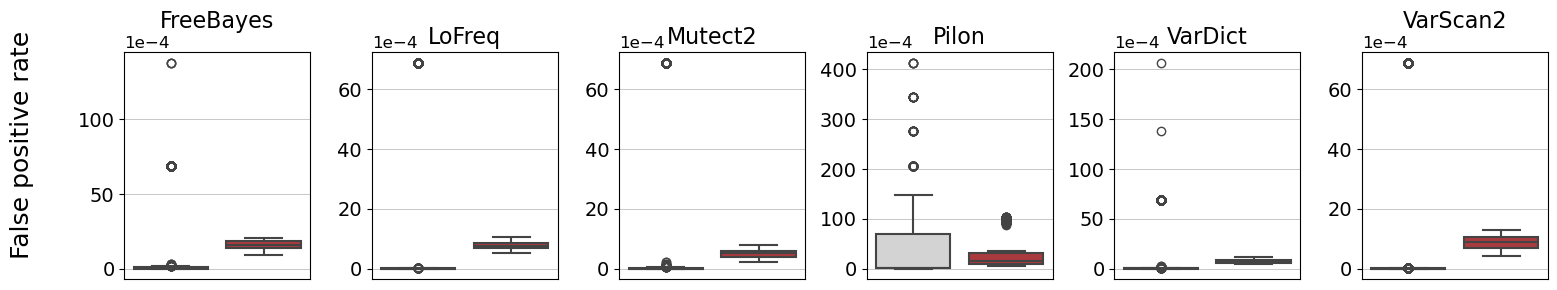

In [62]:
fig, axs = plt.subplots(1, 6, figsize=(15,3))

for tool_i in range(len(tools)):
    
    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    ax = axs[tool_i]

    ax.set_title(tool_name, fontsize=16)

    ax.grid(axis="y", linewidth=0.5, zorder=0)

    tool_plot_df = plot_df[plot_df.tool == tool]
    
    sns.boxplot(tool_plot_df, x="LM_region", y="FPR", hue="LM_region", palette=LM_region_pal,
                linewidth=1.5, legend=False, ax=ax)

    ax.set_xticks([])
    ax.set_xticklabels([])

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(12)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_FPR_LM_vs_nonLM.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_FPR_LM_vs_nonLM.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

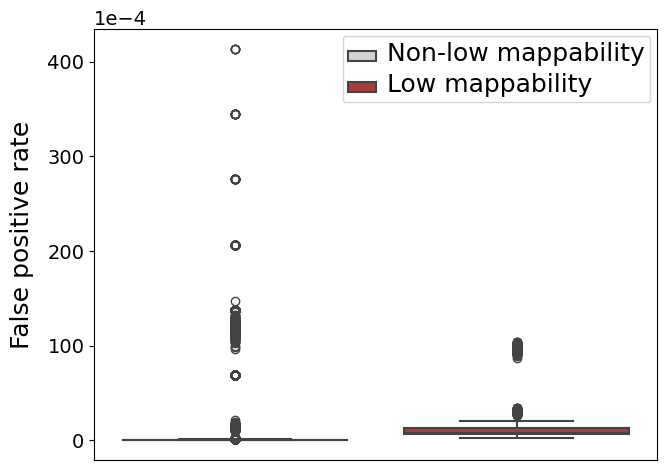

In [61]:
# legend

fig, ax = plt.subplots()

legend_df = plot_df.copy(deep=True)
region_name_mapping = {"LM": "Low mappability",
                       "Non-LM": "Non-low mappability"}
legend_df["LM_region_name"] = legend_df["LM_region"].map(region_name_mapping)

LM_region_name_pal = {"Low mappability": LM_region_pal["LM"], "Non-low mappability": LM_region_pal["Non-LM"]}

tool_plot_df = plot_df[plot_df.tool == "FB"]
    
sns.boxplot(legend_df, x="LM_region_name", y="FPR", hue="LM_region_name", palette=LM_region_name_pal,
            linewidth=1.5, legend=True, ax=ax)

ax.set_xticks([])
ax.set_xticklabels([])

ax.tick_params(labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("")

ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

ax.yaxis.get_offset_text().set_fontsize(14)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.setp(ax.get_legend().get_texts(), fontsize='18')
ax.get_legend().set_title("")

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/LM_region_legend.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/LM_region_legend.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

In [53]:
plot_df.head()

,tag,region,tool,num_FP,FPR,tool_name,LM_region
0,sim1_L1_mutant_50_0.01,DR,FB,0,0.000000,FreeBayes,Non-LM
1,sim1_L1_mutant_50_0.01,HT,FB,0,0.000000,FreeBayes,Non-LM
2,sim1_L1_mutant_50_0.01,LM,FB,663,0.001415,FreeBayes,LM
3,sim1_L1_mutant_50_0.01,other,FB,201,0.000052,FreeBayes,Non-LM
4,sim1_L1_mutant_50_0.01,DR,LF,0,0.000000,LoFreq,Non-LM


In [57]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

p1 = "LM"
p2 = "Non-LM"

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "test_stat", "p_val"])
df_i = 0

for tool in tools:

    tool_df = plot_df[plot_df.tool == tool]

    p1_tool_values = tool_df[tool_df.LM_region == p1]["FPR"].values
    p2_tool_values = tool_df[tool_df.LM_region == p2]["FPR"].values

    p1_mean = np.mean(p1_tool_values)
    p2_mean = np.mean(p2_tool_values)

    test_result = mannwu(p1_tool_values, p2_tool_values)

    all_tools_results_df.loc[df_i] = [tool, p1, p2, test_result[0], test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df


,tool,p1,p2,test_stat,p_val,corrected_p_val,decision
0,FB,LM,Non-LM,2746000.0,0.000000e+00,0.000000e+00,1
1,LF,LM,Non-LM,2751000.0,0.000000e+00,0.000000e+00,1
2,MT,LM,Non-LM,2870000.0,0.000000e+00,0.000000e+00,1
3,PL,LM,Non-LM,1880241.0,2.080499e-33,2.080499e-33,1
4,VD,LM,Non-LM,2792000.0,0.000000e+00,0.000000e+00,1
5,VS,LM,Non-LM,2751000.0,0.000000e+00,0.000000e+00,1


# [done] L1234: FPR in DR vs LM vs OTHER regions

In [21]:
plot_regions = ["DR_nonLM", "other_nonLM", "LM"]

In [7]:
L1234_region_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_L1234_FPR_DR_LM_other.csv")
print(L1234_region_FPR_df.shape)
L1234_region_FPR_df.head(2)

(18000, 5)


,tag,region,tool,num_FP,FPR
0,sim1_L1_mutant_50_0.01,DR_nonLM,FB,0,0.0
1,sim1_L1_mutant_50_0.01,DR_nonLM,LF,0,0.0


In [12]:
L1234_region_FPR_df.region.unique()

array(['DR_nonLM', 'other_nonLM', 'LM'], dtype=object)

In [22]:
L1234_region_FPR_summary_df = pd.DataFrame(columns=["region"] + tools)
L1234_region_FPR_summary_df["region"] = plot_regions
L1234_region_FPR_summary_df.set_index("region", inplace=True)

for region in plot_regions:

    region_df = L1234_region_FPR_df[L1234_region_FPR_df.region == region]

    for tool in tools:
        tool_region_df = region_df[region_df.tool == tool]
        median_tool_region_FPR = tool_region_df.FPR.median()
        L1234_region_FPR_summary_df.loc[region, tool] = median_tool_region_FPR

L1234_region_FPR_summary_df

,FB,LF,MT,PL,VD,VS
region,,,,,,
DR_nonLM,0.000027,0.0,0.0,0.000109,0.0,0.0
other_nonLM,0.000039,0.000004,0.000018,0.000111,0.000004,0.000003
LM,0.001602,0.00076,0.000527,0.001494,0.000736,0.000888


In [23]:
L1234_region_FPR_summary_df.to_csv("./data/FP_characteristics/L1234_region_FPR_summary.csv", index=True)

In [13]:
plot_region_mapping = {"DR_nonLM": "DR",
                       "other_nonLM": "other",
                       "LM": "LM"}

In [14]:
plot_df = L1234_region_FPR_df.copy(deep=True)

plot_df["tool_name"] = plot_df["tool"].map(tool_mapping)
plot_df["plot_region"] = plot_df["region"].map(plot_region_mapping)

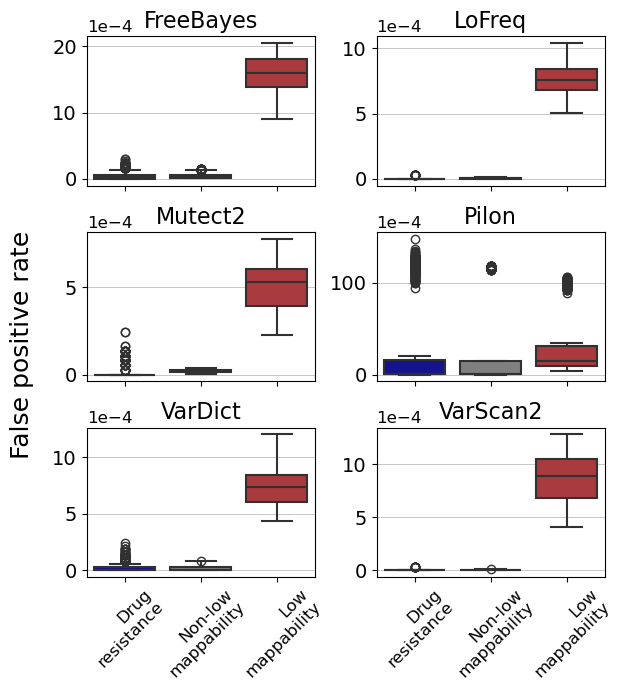

In [34]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):
    
    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=16)

    ax.grid(axis="y", linewidth=0.5, zorder=0)

    tool_plot_df = plot_df[plot_df.tool == tool]
    
    sns.boxplot(tool_plot_df, x="region", y="FPR", hue="plot_region", palette=region_colors,
                linewidth=1.5, legend=False, ax=ax)

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(["Drug\nresistance", "Non-low\nmappability", "Low\nmappability"], fontsize=12, rotation=45, ma="right", ha="center")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(12)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_FPR_DR_LM_other.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_FPR_DR_LM_other.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

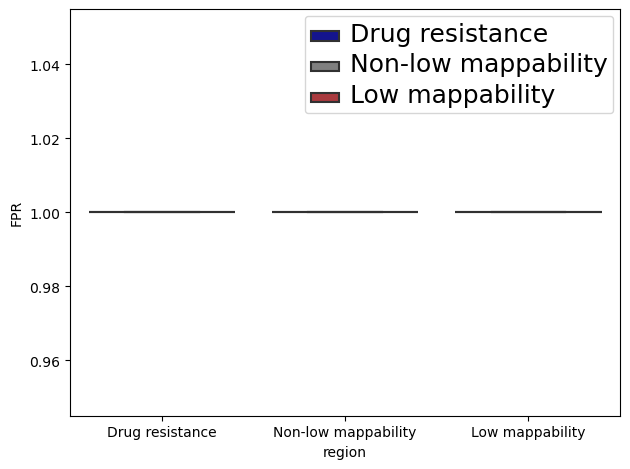

In [33]:
# legend

fig, ax = plt.subplots()

legend_df = pd.DataFrame(columns=["FPR", "region"])
legend_df.loc[0] = [1, "Drug resistance"]
legend_df.loc[1] = [1, "Non-low mappability"]
legend_df.loc[2] = [1, "Low mappability"]

legend_pal = {"Drug resistance": region_colors["DR"],
              "Non-low mappability": region_colors["other"],
              "Low mappability": region_colors["LM"]}
    
sns.boxplot(legend_df, x="region", y="FPR", hue="region", palette=legend_pal,
            linewidth=1.5, legend=True, ax=ax)

plt.setp(ax.get_legend().get_texts(), fontsize='18')
ax.get_legend().set_title("")

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/DR_LM_other_region_legend.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/DR_LM_other_region_legend.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

In [20]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

plot_region_combos = list(combinations(plot_regions, 2))

all_tools_results_df = pd.DataFrame(columns=["region1", "region2", "region2-region1_mean_diff", "p_val"])
df_i = 0

for region1, region2 in plot_region_combos:

    region1_values = L1234_region_FPR_df[L1234_region_FPR_df.region == region1]["FPR"].values
    region2_values = L1234_region_FPR_df[L1234_region_FPR_df.region == region2]["FPR"].values
    
    test_result = mannwu(region1_values, region2_values)

    all_tools_results_df.loc[df_i] = [region1, region2, np.mean(region2_values)-np.mean(region1_values), test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df

,region1,region2,region2-region1_mean_diff,p_val,corrected_p_val,decision
0,DR_nonLM,other_nonLM,0.000001,0.0,0.0,1
1,DR_nonLM,LM,0.000825,0.0,0.0,1
2,other_nonLM,LM,0.000824,0.0,0.0,1


# [done] H37Rv: FPR in DR vs LM vs OTHER regions

In [6]:
plot_regions = ["DR_nonLM", "other_nonLM", "LM"]

In [56]:
Rv_region_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_H37Rv_FPR_DR_LM_other.csv")
print(Rv_region_FPR_df.shape)
Rv_region_FPR_df.head(2)

(45000, 5)


,tag,region,tool,num_FP,FPR
0,sim1_h37rv_mutant_1_50_0.01,DR_nonLM,FB,1,0.000027
1,sim1_h37rv_mutant_1_50_0.01,DR_nonLM,LF,0,0.000000


In [11]:
Rv_region_FPR_df.region.unique()

array(['DR_nonLM', 'other_nonLM', 'LM'], dtype=object)

In [12]:
Rv_region_FPR_summary_df = pd.DataFrame(columns=["region"] + tools)
Rv_region_FPR_summary_df["region"] = plot_regions
Rv_region_FPR_summary_df.set_index("region", inplace=True)

for region in plot_regions:

    region_df = Rv_region_FPR_df[Rv_region_FPR_df.region == region]

    for tool in tools:
        tool_region_df = region_df[region_df.tool == tool]
        median_tool_region_FPR = tool_region_df.FPR.median()
        Rv_region_FPR_summary_df.loc[region, tool] = median_tool_region_FPR

Rv_region_FPR_summary_df

,FB,LF,MT,PL,VD,VS
region,,,,,,
DR_nonLM,0.0,0.0,0.0,0.000109,0.0,0.0
other_nonLM,0.000031,0.0,0.0,0.00011,0.0,0.0
LM,0.000028,0.0,0.0,0.000341,0.0,0.000002


In [13]:
Rv_region_FPR_summary_df.to_csv("./data/FP_characteristics/H37Rv_region_FPR_summary.csv", index=True)

In [14]:
plot_region_mapping = {"DR_nonLM": "DR",
                       "other_nonLM": "other",
                       "LM": "LM"}

In [15]:
plot_df = Rv_region_FPR_df.copy(deep=True)

plot_df["tool_name"] = plot_df["tool"].map(tool_mapping)
plot_df["plot_region"] = plot_df["region"].map(plot_region_mapping)

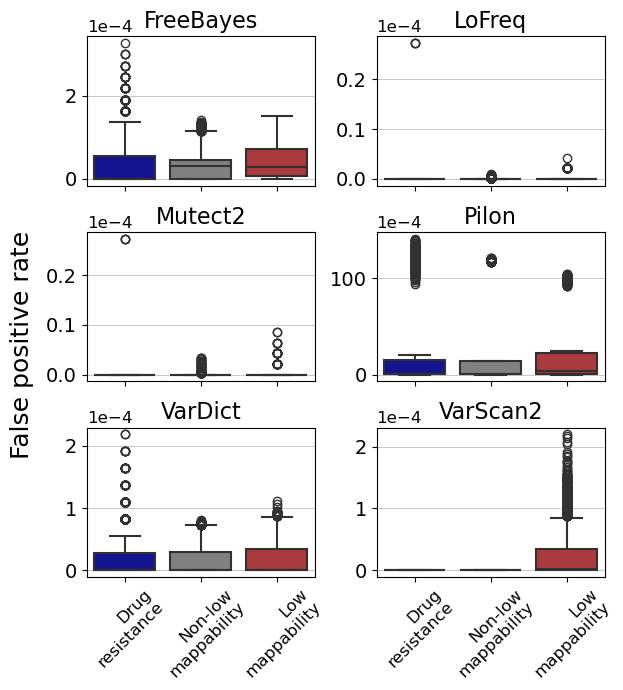

In [16]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):
    
    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=16)

    ax.grid(axis="y", linewidth=0.5, zorder=0)

    tool_plot_df = plot_df[plot_df.tool == tool]
    
    sns.boxplot(tool_plot_df, x="region", y="FPR", hue="plot_region", palette=region_colors,
                linewidth=1.5, legend=False, ax=ax)

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(["Drug\nresistance", "Non-low\nmappability", "Low\nmappability"], fontsize=12, rotation=45, ma="right", ha="center")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(12)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_H37Rv_FPR_DR_LM_other.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_H37Rv_FPR_DR_LM_other.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

In [57]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

plot_region_combos = list(combinations(plot_regions, 2))

all_tools_results_df = pd.DataFrame(columns=["region1", "region2", "region2-region1_mean_diff", "p_val"])
df_i = 0

for region1, region2 in plot_region_combos:

    region1_values = Rv_region_FPR_df[Rv_region_FPR_df.region == region1]["FPR"].values
    region2_values = Rv_region_FPR_df[Rv_region_FPR_df.region == region2]["FPR"].values
    
    test_result = mannwu(region1_values, region2_values)

    all_tools_results_df.loc[df_i] = [region1, region2, np.mean(region2_values)-np.mean(region1_values), test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df

,region1,region2,region2-region1_mean_diff,p_val,corrected_p_val,decision
0,DR_nonLM,other_nonLM,-6.059824e-07,1.375714e-50,1.375714e-50,1
1,DR_nonLM,LM,-2.630150e-05,3.333215e-213,9.999645e-213,1
2,other_nonLM,LM,-2.569551e-05,7.917814e-71,1.187672e-70,1


# [done] FPR in DR vs LM vs OTHER regions combined

In [18]:
Rv_region_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_H37Rv_FPR_DR_LM_other.csv")
print(Rv_region_FPR_df.shape)
Rv_region_FPR_df.head(2)

(45000, 5)


,tag,region,tool,num_FP,FPR
0,sim1_h37rv_mutant_1_50_0.01,DR_nonLM,FB,1,0.000027
1,sim1_h37rv_mutant_1_50_0.01,DR_nonLM,LF,0,0.000000


In [17]:
L1234_region_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_L1234_FPR_DR_LM_other.csv")
print(L1234_region_FPR_df.shape)
L1234_region_FPR_df.head(2)

(18000, 5)


,tag,region,tool,num_FP,FPR
0,sim1_L1_mutant_50_0.01,DR_nonLM,FB,0,0.0
1,sim1_L1_mutant_50_0.01,DR_nonLM,LF,0,0.0


In [19]:
region_FPR_df = pd.concat([Rv_region_FPR_df, L1234_region_FPR_df])
print(region_FPR_df.shape)
region_FPR_df.head(2)

(63000, 5)


,tag,region,tool,num_FP,FPR
0,sim1_h37rv_mutant_1_50_0.01,DR_nonLM,FB,1,0.000027
1,sim1_h37rv_mutant_1_50_0.01,DR_nonLM,LF,0,0.000000


In [53]:
region_FPR_summary_df = pd.DataFrame(columns=["region"] + tools)
region_FPR_summary_df["region"] = plot_regions
region_FPR_summary_df.set_index("region", inplace=True)

for region in plot_regions:

    region_df = region_FPR_df[region_FPR_df.region == region]

    for tool in tools:
        tool_region_df = region_df[region_df.tool == tool]
        median_tool_region_FPR = tool_region_df.FPR.median()
        region_FPR_summary_df.loc[region, tool] = median_tool_region_FPR

region_FPR_summary_df

,FB,LF,MT,PL,VD,VS
region,,,,,,
DR_nonLM,0.0,0.0,0.0,0.000109,0.0,0.0
other_nonLM,0.000032,0.0,0.0,0.000111,0.000003,0.0
LM,0.000064,0.0,0.0,0.00094,0.000028,0.000023


In [23]:
region_FPR_summary_df.to_csv("./data/FP_characteristics/region_FPR_summary.csv", index=True)

In [24]:
plot_region_mapping = {"DR_nonLM": "DR",
                       "other_nonLM": "other",
                       "LM": "LM"}

In [25]:
plot_df = region_FPR_df.copy(deep=True)

plot_df["tool_name"] = plot_df["tool"].map(tool_mapping)
plot_df["plot_region"] = plot_df["region"].map(plot_region_mapping)

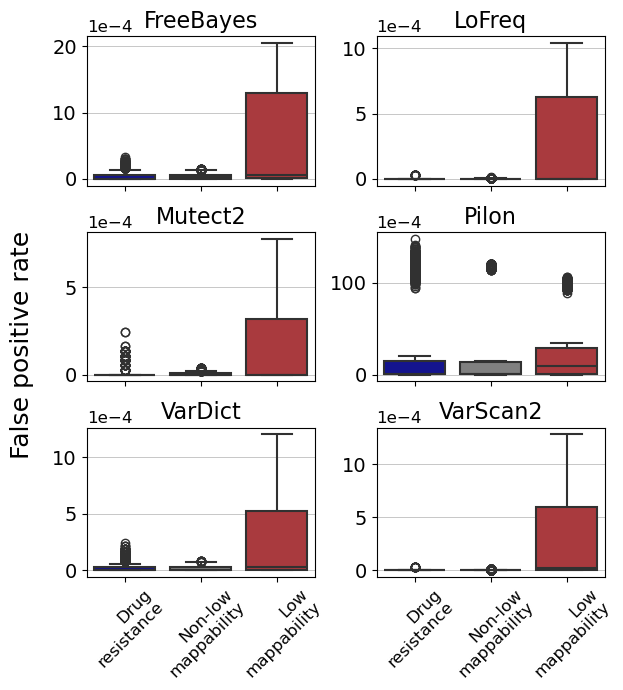

In [26]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):
    
    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=16)

    ax.grid(axis="y", linewidth=0.5, zorder=0)

    tool_plot_df = plot_df[plot_df.tool == tool]
    
    sns.boxplot(tool_plot_df, x="region", y="FPR", hue="plot_region", palette=region_colors,
                linewidth=1.5, legend=False, ax=ax)

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(["Drug\nresistance", "Non-low\nmappability", "Low\nmappability"], fontsize=12, rotation=45, ma="right", ha="center")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(12)

fig.text(-0.035, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=18) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_FPR_DR_LM_other.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_FPR_DR_LM_other.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

plt.show()

In [27]:
region_FPR_df.region.unique()

array(['DR_nonLM', 'other_nonLM', 'LM'], dtype=object)

In [28]:
DR_nonLM_df = region_FPR_df[region_FPR_df.region == "DR_nonLM"]
all_DR_nonLM_FPRs = list(DR_nonLM_df["FPR"].values)

other_nonLM_df = region_FPR_df[region_FPR_df.region == "other_nonLM"]
all_other_nonLM_FPRs = list(other_nonLM_df["FPR"].values)

LM_df = L1234_region_FPR_df[L1234_region_FPR_df.region != "LM"]
all_LM_FPRs = list(LM_df["FPR"].values)

In [29]:
np.median(all_LM_FPRs)

np.float64(4.096040894872295e-06)

In [30]:
np.median(all_other_nonLM_FPRs)

np.float64(1.5360153355771105e-06)

In [31]:
np.median(all_DR_nonLM_FPRs)

np.float64(0.0)

In [32]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

plot_region_combos = list(combinations(plot_regions, 2))

all_tools_results_df = pd.DataFrame(columns=["region1", "region2", "region2-region1_mean_diff", "p_val"])
df_i = 0

for region1, region2 in plot_region_combos:

    region1_values = region_FPR_df[region_FPR_df.region == region1]["FPR"].values
    region2_values = region_FPR_df[region_FPR_df.region == region2]["FPR"].values
    
    test_result = mannwu(region1_values, region2_values)

    all_tools_results_df.loc[df_i] = [region1, region2, np.mean(region2_values)-np.mean(region1_values), test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df

,region1,region2,region2-region1_mean_diff,p_val,corrected_p_val,decision
0,DR_nonLM,other_nonLM,-1.201505e-08,0.0,0.0,1
1,DR_nonLM,LM,2.169591e-04,0.0,0.0,1
2,other_nonLM,LM,2.169711e-04,0.0,0.0,1


# [done] FP AF distribution in DR vs LM vs OTHER regions

## H37Rv

In [38]:
with open(f"./data/FP_characteristics/ISS_H37Rv_FP_AF_distr_DR_LM_other.pkl", "rb") as in_f:
    Rv_FP_AF_distr_DR_LM_other_dict = pickle.load(in_f)

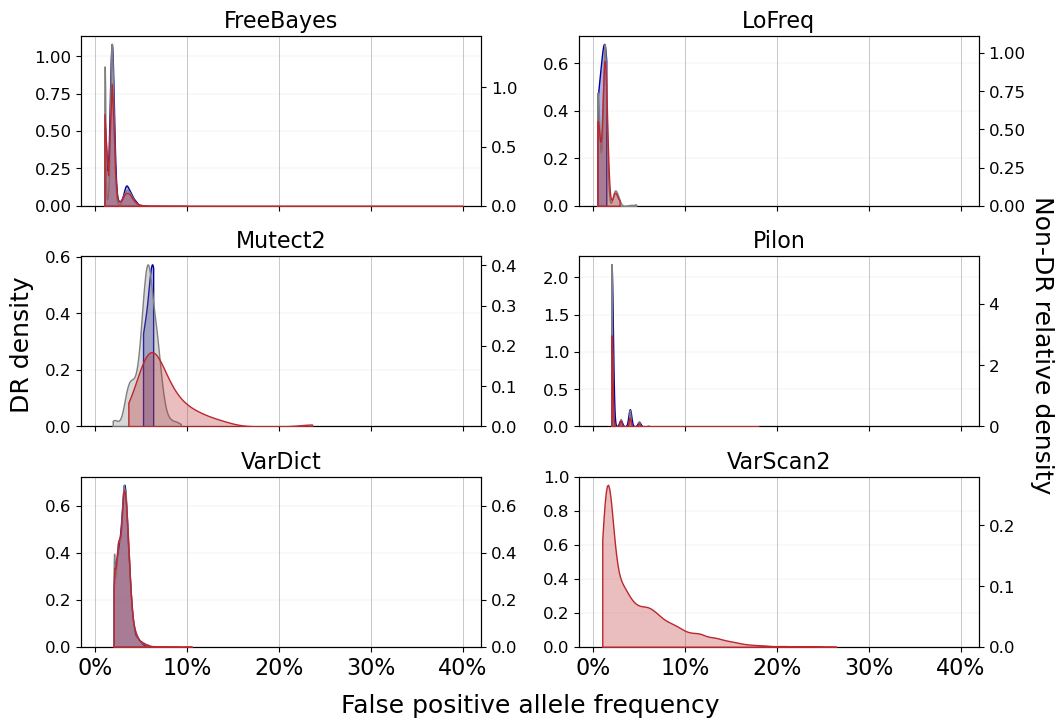

In [29]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    DR_nonLM_tool_vals = np.array(Rv_FP_AF_distr_DR_LM_other_dict[tool]["DR_nonLM"])
    other_nonLM_tool_vals = np.array(Rv_FP_AF_distr_DR_LM_other_dict[tool]["other_nonLM"])
    LM_tool_vals = np.array(Rv_FP_AF_distr_DR_LM_other_dict[tool]["LM"])

    if tool == "PL":
        DR_nonLM_tool_vals = DR_nonLM_tool_vals[DR_nonLM_tool_vals > 1]
        other_nonLM_tool_vals = other_nonLM_tool_vals[other_nonLM_tool_vals > 1]
        LM_tool_vals = LM_tool_vals[LM_tool_vals > 1]

    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(f"{tool_name}", fontsize=16)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)

    ax_right = ax.twinx()

    sns.kdeplot(other_nonLM_tool_vals, color=region_colors["other"], fill=True, alpha=0.3, 
                common_norm=False, cut=0, zorder=3, ax=ax_right)
    sns.kdeplot(LM_tool_vals, color=region_colors["LM"], fill=True, alpha=0.3, 
                common_norm=False, cut=0, zorder=3, ax=ax_right)
    sns.kdeplot(DR_nonLM_tool_vals, color=region_colors["DR"], fill=True, alpha=0.3, 
                common_norm=False, cut=0, zorder=3, ax=ax)

    ax.tick_params(axis="x", labelsize=16)
    
    ax.tick_params(axis="y", labelsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax_right.tick_params(axis="y", labelsize=12)
    ax_right.set_ylabel("")

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

fig.text(0.5, -0.025, "False positive allele frequency", ha='center', fontsize=18)
fig.text(-0.02, 0.5, "DR density", rotation='vertical', va='center', fontsize=18)
fig.text(1, 0.5, "Non-DR relative density", rotation=270, va='center', fontsize=18)

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_H37Rv_FP_AF_distr_DR_LM_other.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_H37Rv_FP_AF_distr_DR_LM_other.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [40]:
for tool in tools:

    try:
        print(tool, np.max(Rv_FP_AF_distr_DR_LM_other_dict[tool]["DR_nonLM"]))
    except ValueError:
        print(tool, np.nan)

FB 5.55555555555555
LF 1.4354
MT 6.3
PL 6.0
VD 5.7700000000000005
VS nan


In [42]:
for tool in tools:

    try:
        print(tool, np.max(Rv_FP_AF_distr_DR_LM_other_dict[tool]["other_nonLM"]))
    except ValueError:
        print(tool, np.nan)

FB 10.0
LF 4.6875
MT 9.3
PL 9.0
VD 9.09
VS nan


In [44]:
for tool in tools:

    print(tool, np.max(Rv_FP_AF_distr_DR_LM_other_dict[tool]["LM"]))

FB 40.0
LF 2.8846
MT 23.599999999999998
PL 18.0
VD 10.530000000000001
VS 26.47


In [46]:
for tool in tools:

    other_nonLM_AFs = np.array(Rv_FP_AF_distr_DR_LM_other_dict[tool]["other_nonLM"])

    if tool == "PL":
        other_nonLM_AFs = other_nonLM_AFs[other_nonLM_AFs > 1]
        
    other_nonLM_AFs_over10 = other_nonLM_AFs[other_nonLM_AFs > 10]

    if len(other_nonLM_AFs) > 0:
        print(tool, (len(other_nonLM_AFs_over10)/len(other_nonLM_AFs))*100)
    else:
        print(tool, np.nan)

FB 0.0
LF 0.0
MT 0.0
PL 0.0
VD 0.0
VS nan


In [47]:
for tool in tools:

    LM_AFs = np.array(Rv_FP_AF_distr_DR_LM_other_dict[tool]["LM"])

    if tool == "PL":
        LM_AFs = LM_AFs[LM_AFs > 1]
        
    LM_AFs_over10 = LM_AFs[LM_AFs > 10]

    if len(LM_AFs) > 0:
        print(tool, (len(LM_AFs_over10)/len(LM_AFs))*100)
    else:
        print(tool, np.nan)

FB 0.0399560483468185
LF 0.0
MT 11.594202898550725
PL 0.06326374321579596
VD 0.0045136538027533285
VS 10.80768513337064


## L1234

In [21]:
with open(f"./data/FP_characteristics/ISS_L1234_FP_AF_distr_DR_LM_other.pkl", "rb") as in_f:
    L1234_FP_AF_distr_DR_LM_other_dict = pickle.load(in_f)

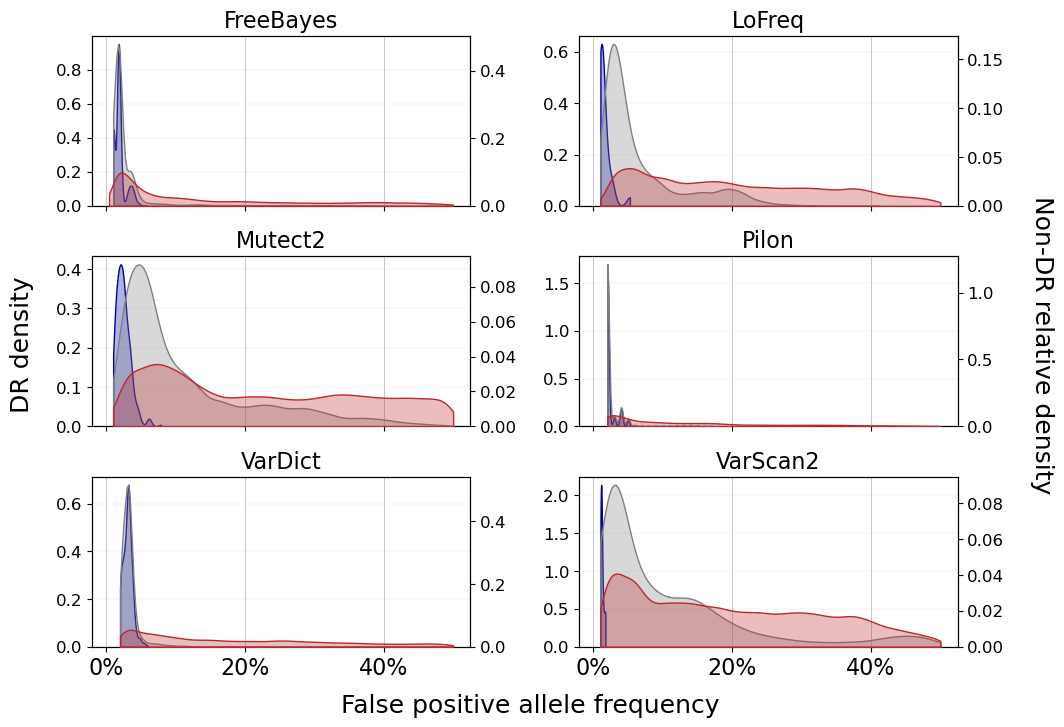

In [27]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    DR_nonLM_tool_vals = np.array(L1234_FP_AF_distr_DR_LM_other_dict[tool]["DR_nonLM"])
    other_nonLM_tool_vals = np.array(L1234_FP_AF_distr_DR_LM_other_dict[tool]["other_nonLM"])
    LM_tool_vals = np.array(L1234_FP_AF_distr_DR_LM_other_dict[tool]["LM"])

    if tool == "PL":
        DR_nonLM_tool_vals = DR_nonLM_tool_vals[DR_nonLM_tool_vals > 1]
        other_nonLM_tool_vals = other_nonLM_tool_vals[other_nonLM_tool_vals > 1]
        LM_tool_vals = LM_tool_vals[LM_tool_vals > 1]

    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(f"{tool_name}", fontsize=16)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)

    ax_right = ax.twinx()

    sns.kdeplot(other_nonLM_tool_vals, color=region_colors["other"], fill=True, alpha=0.3, 
                common_norm=False, cut=0, zorder=3, ax=ax_right)
    sns.kdeplot(LM_tool_vals, color=region_colors["LM"], fill=True, alpha=0.3, 
                common_norm=False, cut=0, zorder=3, ax=ax_right)
    sns.kdeplot(DR_nonLM_tool_vals, color=region_colors["DR"], fill=True, alpha=0.3, 
                common_norm=False, cut=0, zorder=3, ax=ax)

    ax.tick_params(axis="x", labelsize=16)
    
    ax.tick_params(axis="y", labelsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax_right.tick_params(axis="y", labelsize=12)
    ax_right.set_ylabel("")

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

fig.text(0.5, -0.025, "False positive allele frequency", ha='center', fontsize=18)
fig.text(-0.02, 0.5, "DR density", rotation='vertical', va='center', fontsize=18)
fig.text(1, 0.5, "Non-DR relative density", rotation=270, va='center', fontsize=18)

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_FP_AF_distr_DR_LM_other.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_FP_AF_distr_DR_LM_other.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [31]:
for tool in tools:

    print(tool, np.max(L1234_FP_AF_distr_DR_LM_other_dict[tool]["DR_nonLM"]))

FB 5.88235294117647
LF 5.263199999999999
MT 7.9
PL 6.0
VD 6.0
VS 1.73


In [32]:
for tool in tools:

    print(tool, np.max(L1234_FP_AF_distr_DR_LM_other_dict[tool]["other_nonLM"]))

FB 49.46236559139785
LF 41.1765
MT 50.0
PL 32.0
VD 49.75
VS 50.0


In [33]:
for tool in tools:

    print(tool, np.max(L1234_FP_AF_distr_DR_LM_other_dict[tool]["LM"]))

FB 50.0
LF 50.0
MT 50.0
PL 50.0
VD 50.0
VS 50.0


In [36]:
for tool in tools:

    other_nonLM_AFs = np.array(L1234_FP_AF_distr_DR_LM_other_dict[tool]["other_nonLM"])

    if tool == "PL":
        other_nonLM_AFs = other_nonLM_AFs[other_nonLM_AFs > 1]
        
    other_nonLM_AFs_over10 = other_nonLM_AFs[other_nonLM_AFs > 10]

    print(tool, (len(other_nonLM_AFs_over10)/len(other_nonLM_AFs))*100)

FB 6.196040834095589
LF 20.63943367761402
MT 37.72677295217152
PL 3.79392053190925
VD 2.5059984004265528
VS 38.22341857335128


In [37]:
for tool in tools:

    LM_AFs = np.array(L1234_FP_AF_distr_DR_LM_other_dict[tool]["LM"])

    if tool == "PL":
        LM_AFs = LM_AFs[LM_AFs > 1]
        
    LM_AFs_over10 = LM_AFs[LM_AFs > 10]

    print(tool, (len(LM_AFs_over10)/len(LM_AFs))*100)

FB 46.54191903780774
LF 71.39971260759776
MT 71.20261852875063
PL 50.33976661296726
VD 62.726666510681106
VS 68.50317520256878


## Summary

In [34]:
with open(f"./data/FP_characteristics/ISS_H37Rv_FP_AF_distr_DR_LM_other.pkl", "rb") as in_f:
    Rv_FP_AF_distr_DR_LM_other_dict = pickle.load(in_f)

In [35]:
with open(f"./data/FP_characteristics/ISS_L1234_FP_AF_distr_DR_LM_other.pkl", "rb") as in_f:
    L1234_FP_AF_distr_DR_LM_other_dict = pickle.load(in_f)

In [46]:
all_LM_AFs = []

for tool in tools:

    all_LM_AFs += (Rv_FP_AF_distr_DR_LM_other_dict[tool]["LM"] + L1234_FP_AF_distr_DR_LM_other_dict[tool]["LM"])

print(np.mean(all_LM_AFs))

all_LM_AFs = np.array(all_LM_AFs)
all_LM_AFs = all_LM_AFs[all_LM_AFs > 1]

print(np.median(all_LM_AFs))

7.327350926690014
12.676056338028168


In [48]:
all_DR_nonLM_AFs = []

for tool in tools:

    all_DR_nonLM_AFs += (Rv_FP_AF_distr_DR_LM_other_dict[tool]["DR_nonLM"] + L1234_FP_AF_distr_DR_LM_other_dict[tool]["DR_nonLM"])

print(np.mean(all_DR_nonLM_AFs))

all_DR_nonLM_AFs = np.array(all_DR_nonLM_AFs)
all_DR_nonLM_AFs = all_DR_nonLM_AFs[all_DR_nonLM_AFs > 1]

print(np.median(all_DR_nonLM_AFs))

1.0419476036092346
2.0


In [44]:
all_other_nonLM_AFs = []

for tool in tools:

    all_other_nonLM_AFs += (Rv_FP_AF_distr_DR_LM_other_dict[tool]["other_nonLM"] + L1234_FP_AF_distr_DR_LM_other_dict[tool]["other_nonLM"])

print(np.mean(all_other_nonLM_AFs))

all_other_nonLM_AFs = np.array(all_other_nonLM_AFs)
all_other_nonLM_AFs = all_other_nonLM_AFs[all_other_nonLM_AFs > 1]

print(np.median(all_other_nonLM_AFs))

1.0798987354670768
2.0


# [done] FPR by lineage background L1-4

In [104]:
L1234_lineage_FPR_df = pd.read_csv("./data/FP_characteristics/ISS_L1234_lineage_FPR.csv")
print(L1234_lineage_FPR_df.shape)
L1234_lineage_FPR_df.head(2)

(6000, 5)


,tag,lineage,tool,num_FP,FPR
0,sim1_L1_mutant_50_0.01,Lineage 1,FB,864,0.000196
1,sim1_L1_mutant_50_0.01,Lineage 1,LF,358,0.000081


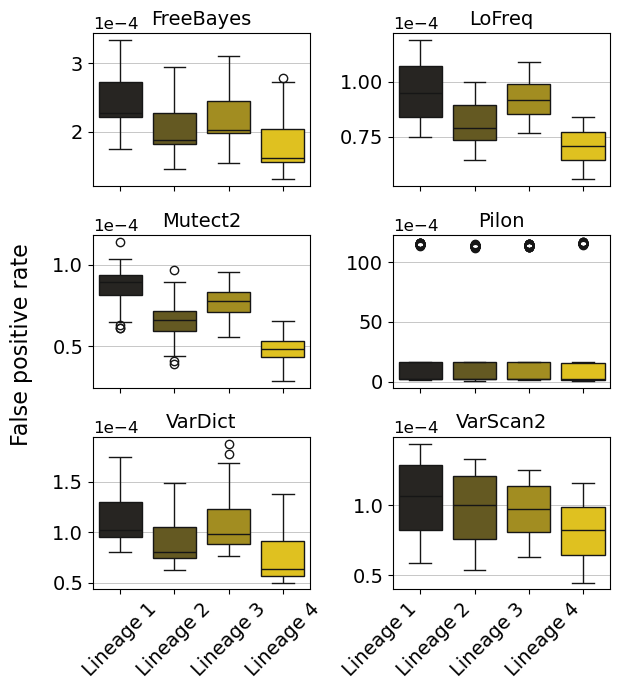

In [111]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]
    
    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=14)
    
    tool_lineage_FPR_df = L1234_lineage_FPR_df[L1234_lineage_FPR_df.tool == tool]

    ax.grid(axis="y", linewidth=0.5, zorder=0)
    
    sns.boxplot(tool_lineage_FPR_df, x="lineage", y="FPR", hue="lineage", palette=sns.dark_palette(Rv_L1234_palette["L1234"], 4),
                fill=True, legend=False, ax=ax)

    ax.tick_params(labelsize=14)

    ax.tick_params(axis='x', labelrotation=45, labelsize=14) 
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))

    ax.yaxis.get_offset_text().set_fontsize(12)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontdict={"horizontalalignment": "right"})

fig.text(-0.025, 0.5, "False positive rate", rotation='vertical', va='center', fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_FPR_per_lineage.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_FPR_per_lineage.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()
plt.close()

In [112]:
L1234_lineage_FPR_df.head(2)

,tag,lineage,tool,num_FP,FPR
0,sim1_L1_mutant_50_0.01,Lineage 1,FB,864,0.000196
1,sim1_L1_mutant_50_0.01,Lineage 1,LF,358,0.000081


In [114]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

lineages = range(1, 5)
lineage_combos = list(combinations(lineages, 2))

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "p2-p1", "test_stat", "p_val"])
df_i = 0

for tool in tools:

    tool_df = L1234_lineage_FPR_df[L1234_lineage_FPR_df.tool == tool]

    for p1, p2 in lineage_combos:

        p1_tool_values = tool_df[tool_df.lineage == f"Lineage {p1}"]["FPR"].values
        p2_tool_values = tool_df[tool_df.lineage == f"Lineage {p2}"]["FPR"].values

        p1_mean = np.mean(p1_tool_values)
        p2_mean = np.mean(p2_tool_values)

        test_result = mannwu(p1_tool_values, p2_tool_values)

        all_tools_results_df.loc[df_i] = [tool, p1, p2, p2_mean-p1_mean, test_result[0], test_result[1]]
        df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df


,tool,p1,p2,p2-p1,test_stat,p_val,corrected_p_val,decision
0,FB,1,2,-0.000039,46381.0,7.473103e-21,1.582539e-20,1
1,FB,1,3,-0.000023,40251.5,2.515160e-08,3.772740e-08,1
2,FB,1,4,-0.000062,52266.5,1.069262e-38,4.811677e-38,1
3,FB,2,3,0.000016,22517.5,6.456474e-08,9.297323e-08,1
4,FB,2,4,-0.000023,41865.5,4.984163e-11,7.801299e-11,1
5,FB,3,4,-0.000039,47380.0,1.768189e-23,3.978424e-23,1
6,LF,1,2,-0.000015,50983.0,2.556256e-34,9.202521e-34,1
7,LF,1,3,-0.000004,36052.5,2.950602e-03,3.124167e-03,1
8,LF,1,4,-0.000025,61201.0,9.532178e-77,8.578960e-76,1
9,LF,2,3,0.000011,12453.5,2.697216e-31,7.469214e-31,1


In [124]:
all_tools_results_df[all_tools_results_df["p2-p1"] == all_tools_results_df["p2-p1"].max()]

,tool,p1,p2,p2-p1,test_stat,p_val,corrected_p_val,decision
22,PL,2,4,0.000021,36210.5,0.002137,0.002331,1


In [117]:
all_tools_results_df[all_tools_results_df["p2-p1"] == all_tools_results_df["p2-p1"].min()]

,tool,p1,p2,p2-p1,test_stat,p_val,corrected_p_val,decision
2,FB,1,4,-0.000062,52266.5,1.069262e-38,4.811677e-38,1


In [118]:
-0.000062

-6.2e-05

In [119]:
L1234_lineage_FPR_df[(L1234_lineage_FPR_df.tool == "FB") & (L1234_lineage_FPR_df.lineage == "Lineage 1")]["FPR"].mean()

np.float64(0.0002455174302259996)

In [123]:
0.0002455174302259996

0.0002455174302259996

In [120]:
L1234_lineage_FPR_df[(L1234_lineage_FPR_df.tool == "FB") & (L1234_lineage_FPR_df.lineage == "Lineage 4")]["FPR"].mean()

np.float64(0.0001837765202654704)

In [125]:
0.0001837765202654704

0.0001837765202654704

In [121]:
0.0002455174302259996-0.0001837765202654704

6.174090996052917e-05

# [done] L1234: SNV error model characteristics

## Coverage distribution (by simulated coverage)

In [14]:
with open(f"./data/FP_characteristics/ISS_L1234_COV_distribution.pkl", "rb") as in_f:
    ISSL1234_COV_distr = pickle.load(in_f)

In [127]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

p1 = "TP"
p2 = "FP"

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "p1_mean", "p2_mean", "test_stat", "p_val"])
df_i = 0

for tool in tools:

    p1_tool_values = np.array(ISSL1234_COV_distr[tool][p1])
    p2_tool_values = np.array(ISSL1234_COV_distr[tool][p2])

    p1_tool_values = p1_tool_values[~pd.isna(p1_tool_values)]
    p2_tool_values = p2_tool_values[~pd.isna(p2_tool_values)]

    p1_mean = np.mean(p1_tool_values)
    p2_mean = np.mean(p2_tool_values)

    test_result = mannwu(p1_tool_values, p2_tool_values)

    all_tools_results_df.loc[df_i] = [tool, p1, p2, p1_mean, p2_mean, test_result[0], test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df


,tool,p1,p2,p1_mean,p2_mean,test_stat,p_val,corrected_p_val,decision
0,FB,TP,FP,0.971340,0.927499,8.846488e+09,1.327858e-199,2.655717e-199,1
1,LF,TP,FP,0.972499,0.958195,2.557621e+09,5.793850e-01,5.793850e-01,0
2,MT,TP,FP,0.971568,0.871658,3.397065e+09,0.000000e+00,0.000000e+00,1
3,PL,TP,FP,0.972308,0.985872,8.643943e+10,0.000000e+00,0.000000e+00,1
4,VD,TP,FP,0.970837,0.944240,3.629200e+09,1.909537e-58,2.291445e-58,1
5,VS,TP,FP,0.973699,0.930951,3.206982e+09,4.814716e-79,7.222074e-79,1


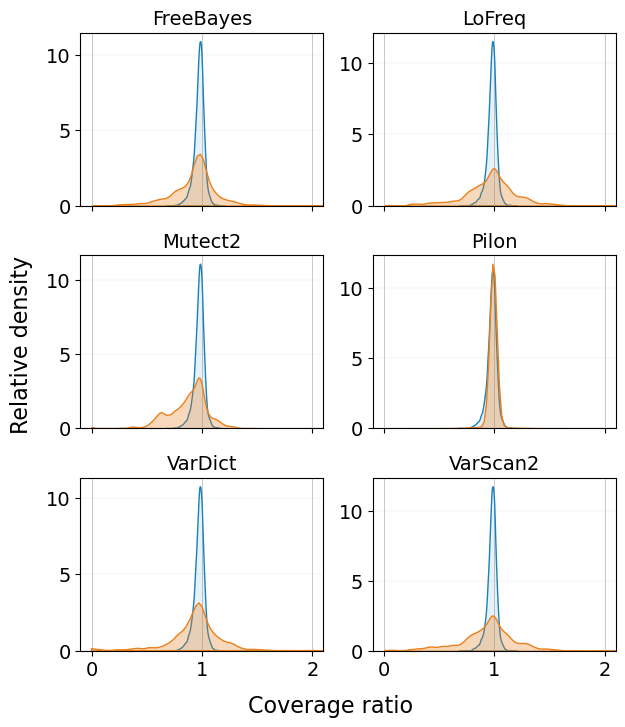

In [11]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    TP_COV = ISSL1234_COV_distr[tool]["TP"]
    FP_COV = ISSL1234_COV_distr[tool]["FP"]
    
    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_xlim(-0.1, 2.1)

    ax.set_title(tool_name, fontsize=14)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)
    
    sns.kdeplot(TP_COV, color=TP_col, label="True positives", fill=True, alpha=0.1,
                cut=0, common_norm=False, zorder=2, legend=False, ax=ax)
    
    sns.kdeplot(FP_COV, color=FP_col, label="False positives", fill=True, alpha=0.3,
                cut=0, common_norm=False, zorder=2, legend=False, ax=ax)

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.text(0.5, -0.025, "Coverage ratio", ha='center', fontsize=16)
fig.text(-0.035, 0.5, "Relative density", rotation='vertical', va='center', fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_coverage_ratio_distribution.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_coverage_ratio_distribution.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [16]:
for tool in tools:

    tool_TP_COV = np.array(ISSL1234_COV_distr[tool]["TP"])
    tool_FP_COV = np.array(ISSL1234_COV_distr[tool]["FP"])
    
    tool_TP_COV_over2 = tool_TP_COV[tool_TP_COV > 2]
    tool_FP_COV_over2 = tool_FP_COV[tool_FP_COV > 2]

    percent_TP_COV_over2 = (len(tool_TP_COV_over2)/len(tool_TP_COV))*100
    percent_FP_COV_over2 = (len(tool_FP_COV_over2)/len(tool_FP_COV))*100

    print(tool, percent_TP_COV_over2, percent_FP_COV_over2, sep="\t")

FB	0.0	0.0908495489214257
LF	0.0	0.12138862194631748
MT	0.0	0.06173141933271275
PL	0.0	0.009909625055746869
VD	0.0	0.20282178725626415
VS	0.0	0.2150234495017429


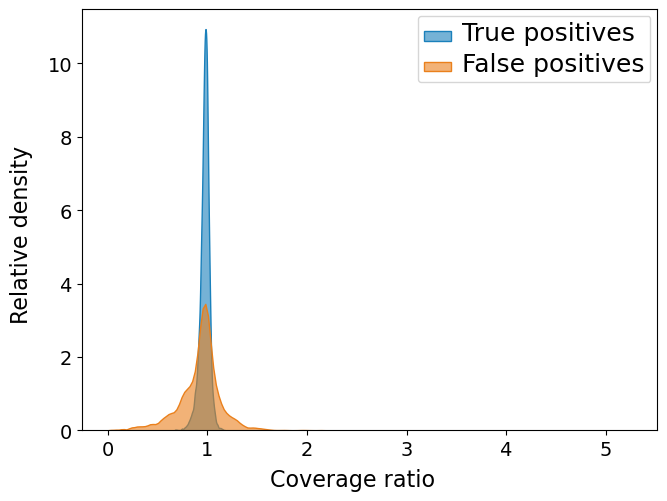

In [136]:
# legend

fig, ax = plt.subplots()

TP_COV = ISSL1234_COV_distr["FB"]["TP"]
FP_COV = ISSL1234_COV_distr["FB"]["FP"]

sns.kdeplot(TP_COV, color=TP_col, label="True positives", fill=True, alpha=0.6,
            cut=0, common_norm=False, ax=ax)

sns.kdeplot(FP_COV, color=FP_col, label="False positives", fill=True, alpha=0.6,
            cut=0, common_norm=False, ax=ax)

plt.legend()

plt.setp(ax.get_legend().get_texts(), fontsize='18')
ax.get_legend().set_title("")

ax.tick_params(labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("")

fig.text(0.5, -0.025, "Coverage ratio", ha='center', fontsize=16)
fig.text(-0.035, 0.5, "Relative density", rotation='vertical', va='center', fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/TP_FP_legend.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/TP_FP_legend.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

## Variant base quality

In [12]:
with open(f"./data/FP_characteristics/ISS_L1234_vBQ_distribution.pkl", "rb") as in_f:
    ISSL1234_vBQ_distr = pickle.load(in_f)

In [138]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

p1 = "TP"
p2 = "FP"

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "p1_mean", "p2_mean", "test_stat", "p_val"])
df_i = 0

for tool in tools:

    p1_tool_values = np.array(ISSL1234_vBQ_distr[tool][p1])
    p2_tool_values = np.array(ISSL1234_vBQ_distr[tool][p2])

    p1_tool_values = p1_tool_values[~pd.isna(p1_tool_values)]
    p2_tool_values = p2_tool_values[~pd.isna(p2_tool_values)]

    p1_mean = np.mean(p1_tool_values)
    p2_mean = np.mean(p2_tool_values)

    test_result = mannwu(p1_tool_values, p2_tool_values)

    all_tools_results_df.loc[df_i] = [tool, p1, p2, p1_mean, p2_mean, test_result[0], test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df


,tool,p1,p2,p1_mean,p2_mean,test_stat,p_val,corrected_p_val,decision
0,FB,TP,FP,35.127665,34.630654,8.066547e+09,1.312975e-52,1.312975e-52,1
1,LF,TP,FP,35.132942,34.603033,2.848717e+09,2.165675e-223,6.497024e-223,1
2,MT,TP,FP,35.118688,33.706840,1.707496e+09,6.578671e-70,7.894405e-70,1
3,PL,TP,FP,35.078661,31.653070,9.190094e+10,4.082410e-201,6.123615e-201,1
4,VD,TP,FP,35.129943,33.337118,3.328928e+09,0.000000e+00,0.000000e+00,1
5,VS,TP,FP,35.135809,34.661423,3.321530e+09,1.393145e-210,2.786289e-210,1


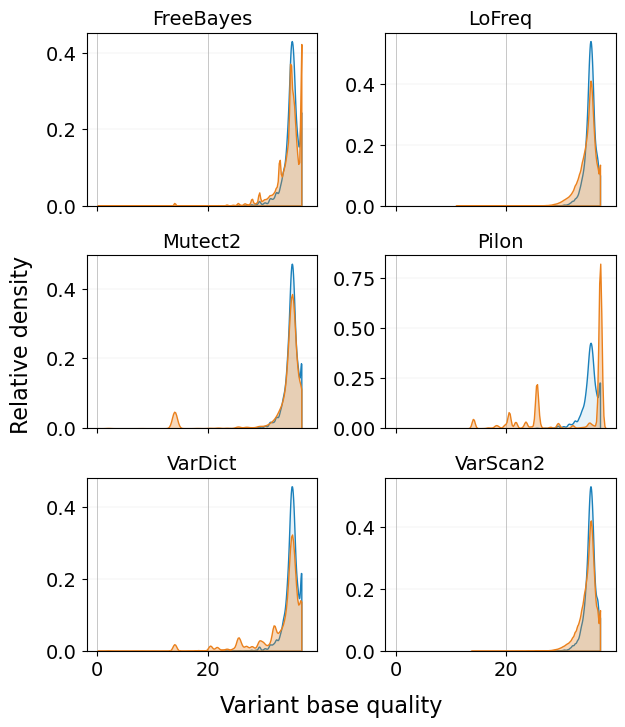

In [13]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    TP_COV = ISSL1234_vBQ_distr[tool]["TP"]
    FP_COV = ISSL1234_vBQ_distr[tool]["FP"]
    
    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=14)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)
    
    sns.kdeplot(TP_COV, color=TP_col, label="True positives", fill=True, alpha=0.1,
                cut=0, common_norm=False, zorder=2, legend=False, ax=ax)
    
    sns.kdeplot(FP_COV, color=FP_col, label="False positives", fill=True, alpha=0.3,
                cut=0, common_norm=False, zorder=2, legend=False, ax=ax)

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.text(0.5, -0.025, "Variant base quality", ha='center', fontsize=16)
fig.text(-0.035, 0.5, "Relative density", rotation='vertical', va='center', fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_vBQ_distribution.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_vBQ_distribution.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

## Soft-clipped bases

In [15]:
with open(f"./data/FP_characteristics/ISS_L1234_SC_distribution.pkl", "rb") as in_f:
    ISSL1234_SC_distr = pickle.load(in_f)

In [141]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

p1 = "TP"
p2 = "FP"

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "p1_mean", "p2_mean", "test_stat", "p_val"])
df_i = 0

for tool in tools:

    p1_tool_values = np.array(ISSL1234_SC_distr[tool][p1])
    p2_tool_values = np.array(ISSL1234_SC_distr[tool][p2])

    p1_tool_values = p1_tool_values[~pd.isna(p1_tool_values)]
    p2_tool_values = p2_tool_values[~pd.isna(p2_tool_values)]

    p1_mean = np.mean(p1_tool_values)
    p2_mean = np.mean(p2_tool_values)

    test_result = mannwu(p1_tool_values, p2_tool_values)

    all_tools_results_df.loc[df_i] = [tool, p1, p2, p1_mean, p2_mean, test_result[0], test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df


,tool,p1,p2,p1_mean,p2_mean,test_stat,p_val,corrected_p_val,decision
0,FB,TP,FP,0.002399,0.209436,3.336076e+09,0.0,0.0,1
1,LF,TP,FP,0.003233,0.226241,8.514272e+08,0.0,0.0,1
2,MT,TP,FP,0.002898,0.570032,5.285817e+08,0.0,0.0,1
3,PL,TP,FP,0.002638,0.007215,1.232383e+11,0.0,0.0,1
4,VD,TP,FP,0.002809,0.313866,1.583000e+09,0.0,0.0,1
5,VS,TP,FP,0.003140,0.261266,1.042876e+09,0.0,0.0,1


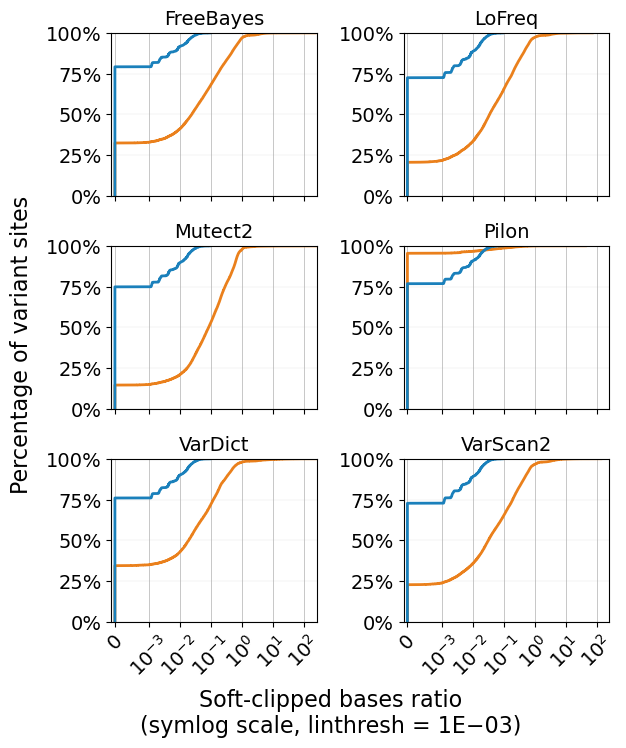

In [16]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    TP_COV = ISSL1234_SC_distr[tool]["TP"]
    FP_COV = ISSL1234_SC_distr[tool]["FP"]
    
    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=14)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)
    
    sns.ecdfplot([TP_COV, FP_COV], stat="percent", palette=[TP_col, FP_col], linewidth=2,
                 zorder=2, legend=False, ax=ax)

    ax.set_xscale("symlog", linthresh=1e-3)
    ax.set_xlim(-10e-5, None)
    ax.set_ylim(0, 100)

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="center")

    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f%%'))

fig.text(-0.035, 0.5, "Percentage of variant sites", rotation='vertical', va="center", ma='center', fontsize=16) 
fig.text(0.5, -0.055, "Soft-clipped bases ratio\n(symlog scale, linthresh = 1E−03)", ha="center", ma='center', fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_SC_distribution.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_SC_distribution.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [22]:
for tool in tools:

    tool_TP_SC = np.array(ISSL1234_SC_distr[tool]["TP"])
    tool_FP_SC = np.array(ISSL1234_SC_distr[tool]["FP"])
    
    tool_TP_SC_at0 = tool_TP_SC[tool_TP_SC == 0]
    tool_FP_SC_at0 = tool_FP_SC[tool_FP_SC == 0]

    percent_TP_SC_at0 = (len(tool_TP_SC_at0)/len(tool_TP_SC))*100
    percent_FP_SC_at0 = (len(tool_FP_SC_at0)/len(tool_FP_SC))*100

    print(tool, percent_TP_SC_at0, percent_FP_SC_at0, sep="\t")

FB	79.17274939172749	32.46212841478101
LF	72.48626876601976	20.630209262271297
MT	74.82146242811098	14.568288341253899
PL	76.75564211249856	95.40517028206305
VD	75.92957477912667	34.31464886186671
VS	72.70661743822777	22.618794482976114


## Discordant reads

In [17]:
with open(f"./data/FP_characteristics/ISS_L1234_DR_distribution.pkl", "rb") as in_f:
    ISSL1234_DR_distr = pickle.load(in_f)

In [144]:
# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

p1 = "TP"
p2 = "FP"

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "p1_mean", "p2_mean", "test_stat", "p_val"])
df_i = 0

for tool in tools:

    p1_tool_values = np.array(ISSL1234_DR_distr[tool][p1])
    p2_tool_values = np.array(ISSL1234_DR_distr[tool][p2])

    p1_tool_values = p1_tool_values[~pd.isna(p1_tool_values)]
    p2_tool_values = p2_tool_values[~pd.isna(p2_tool_values)]

    p1_mean = np.mean(p1_tool_values)
    p2_mean = np.mean(p2_tool_values)

    test_result = mannwu(p1_tool_values, p2_tool_values)

    all_tools_results_df.loc[df_i] = [tool, p1, p2, p1_mean, p2_mean, test_result[0], test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df


,tool,p1,p2,p1_mean,p2_mean,test_stat,p_val,corrected_p_val,decision
0,FB,TP,FP,0.0,0.065281,3.104817e+09,0.000000e+00,0.000000e+00,1
1,LF,TP,FP,0.0,0.072712,5.883803e+08,0.000000e+00,0.000000e+00,1
2,MT,TP,FP,0.0,0.072491,8.577886e+08,0.000000e+00,0.000000e+00,1
3,PL,TP,FP,0.0,0.004279,9.970747e+10,7.105269e-180,7.105269e-180,1
4,VD,TP,FP,0.0,0.178087,1.422310e+09,0.000000e+00,0.000000e+00,1
5,VS,TP,FP,0.0,0.230052,7.149320e+08,0.000000e+00,0.000000e+00,1


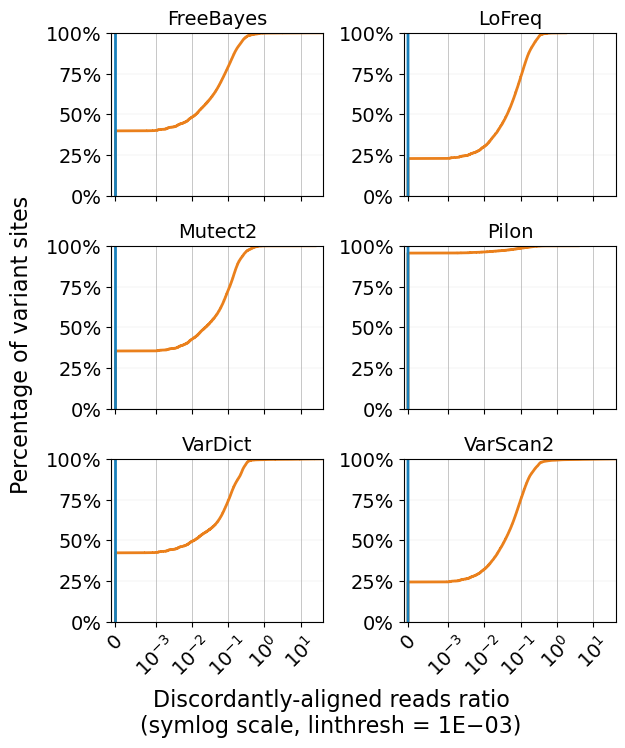

In [18]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,7))

for tool_i in range(len(tools)):

    tool = tools[tool_i]
    tool_name = tool_mapping[tool]

    TP_COV = ISSL1234_DR_distr[tool]["TP"]
    FP_COV = ISSL1234_DR_distr[tool]["FP"]
    
    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=14)

    ax.grid(axis="x", linewidth=0.5, zorder=0)
    ax.grid(axis="y", linewidth=0.1, zorder=0)
    
    sns.ecdfplot([TP_COV, FP_COV], stat="percent", palette=[TP_col, FP_col], linewidth=2,
                 zorder=2, legend=False, ax=ax)

    ax.set_xscale("symlog", linthresh=1e-3)
    ax.set_xlim(-10e-5, None)
    ax.set_ylim(0, 100)

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="center")

    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f%%'))

fig.text(-0.035, 0.5, "Percentage of variant sites", rotation='vertical', va="center", ma='center', fontsize=16) 
fig.text(0.5, -0.055, "Discordantly-aligned reads ratio\n(symlog scale, linthresh = 1E−03)", ha="center", ma='center', fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_DR_distribution.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_DR_distribution.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

In [20]:
for tool in tools:

    tool_TP_DR = np.array(ISSL1234_DR_distr[tool]["TP"])
    tool_FP_DR = np.array(ISSL1234_DR_distr[tool]["FP"])
    
    tool_TP_DR_at0 = tool_TP_DR[tool_TP_DR == 0]
    tool_FP_DR_at0 = tool_FP_DR[tool_FP_DR == 0]

    percent_TP_DR_at0 = (len(tool_TP_DR_at0)/len(tool_TP_DR))*100
    percent_FP_DR_at0 = (len(tool_FP_DR_at0)/len(tool_FP_DR))*100

    print(tool, percent_TP_DR_at0, percent_FP_DR_at0, sep="\t")

FB	100.0	39.90143880332129
LF	100.0	22.940852329144185
MT	100.0	35.41325755719955
PL	100.0	95.52170245518697
VD	100.0	42.15102996167367
VS	100.0	24.25560076357216


## Mapping quality

In [13]:
MQ_tools = ["FB", "MT", "PL", "VD"]

In [11]:
with open(f"./data/FP_characteristics/ISS_L1234_MQ_distribution.pkl", "rb") as in_f:
    ISSL1234_MQ_distr = pickle.load(in_f)

In [152]:
MQ_tools = ["FB", "MT", "PL", "VD"]

# use Mann-Whitney U test (two-sided)
# - not normally distributed
# - equal sample sizes
# - unequal variances
# FDR correction for multiple pairwise tests

p1 = "TP"
p2 = "FP"

all_tools_results_df = pd.DataFrame(columns=["tool", "p1", "p2", "p1_mean", "p2_mean", "test_stat", "p_val"])
df_i = 0

for tool in MQ_tools:

    p1_tool_values = np.array(ISSL1234_MQ_distr[tool][p1])
    p2_tool_values = np.array(ISSL1234_MQ_distr[tool][p2])

    p1_tool_values = p1_tool_values[~pd.isna(p1_tool_values)]
    p2_tool_values = p2_tool_values[~pd.isna(p2_tool_values)]

    p1_mean = np.mean(p1_tool_values)
    p2_mean = np.mean(p2_tool_values)

    test_result = mannwu(p1_tool_values, p2_tool_values)

    all_tools_results_df.loc[df_i] = [tool, p1, p2, p1_mean, p2_mean, test_result[0], test_result[1]]
    df_i += 1

raw_pvalues = all_tools_results_df.p_val.values
#reject, corrected_pvals, _, _ = multipletests(raw_pvalues, alpha=0.001, method='bonferroni')
corrected_pvals = false_discovery_control(raw_pvalues, method='bh')

all_tools_results_df["corrected_p_val"] = corrected_pvals
all_tools_results_df["decision"] = (np.array(corrected_pvals) <= 0.05).astype(int)

all_tools_results_df


,tool,p1,p2,p1_mean,p2_mean,test_stat,p_val,corrected_p_val,decision
0,FB,TP,FP,60.0,51.024271,1.291308e+10,0.000000e+00,0.000000e+00,1
1,MT,TP,FP,60.0,50.153078,3.821911e+09,0.000000e+00,0.000000e+00,1
2,PL,TP,FP,60.0,59.558917,1.097708e+11,1.800680e-208,1.800680e-208,1
3,VD,TP,FP,60.0,44.161737,5.682067e+09,0.000000e+00,0.000000e+00,1


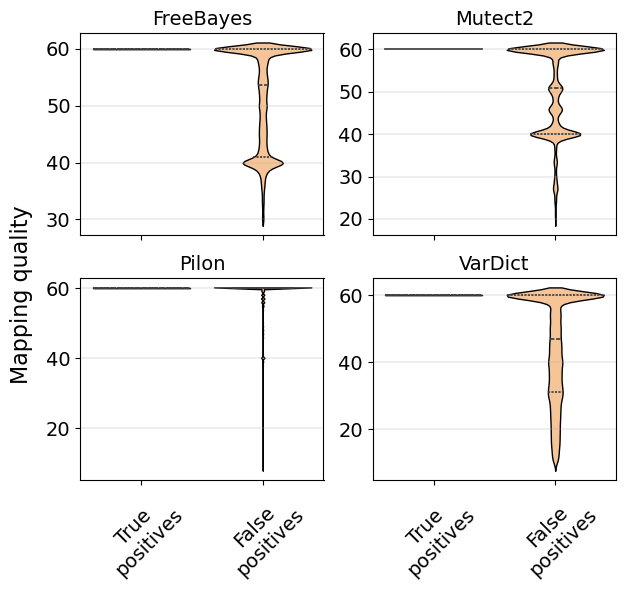

In [32]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(6, 6))

for tool_i in range(len(MQ_tools)):

    tool = MQ_tools[tool_i]
    tool_name = tool_mapping[tool]

    TP_COV = ISSL1234_MQ_distr[tool]["TP"]
    FP_COV = ISSL1234_MQ_distr[tool]["FP"]
    
    ax_i, ax_j = tool_i//2, tool_i%2
    ax = axs[ax_i][ax_j]

    ax.set_title(tool_name, fontsize=14)

    ax.grid(axis="y", linewidth=0.3, zorder=0)

    vp = sns.violinplot([TP_COV, FP_COV], inner="quart", fill=True, palette=[TP_col, FP_col], ax=ax)
    for pc_i in range(len(vp.collections)):
        pc = vp.collections[pc_i]
        pc.set_facecolor(faded_P_cols["FP"])
        pc.set_edgecolor("black")
        pc.set_linewidth(1)

    ax.tick_params(labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.set_xticks([0, 1])
    ax.set_xticklabels(["True\npositives", "False\npositives"], fontsize=14, rotation=45, horizontalalignment="center")

fig.text(-0.035, 0.5, "Mapping quality", rotation='vertical', va='center', fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/FP_characteristics/ISS_L1234_MQ_distribution.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/FP_characteristics/ISS_L1234_MQ_distribution.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()